## PASO 0 EXTRACCION DE DATOS (df_v0)

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import re
import mysql.connector

In [2]:
# REALIZAMOS LA EXTRACCION DE DATOS

# CARGAMOS EL CSV CON DATS NULL
df_Base0 = pd.read_csv('Step0JamonesData.csv',sep =";" ,na_values = "NULL")

C:\Users\danny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# SUSTITUIMOS 0 POR nan
df_Base1 = df_Base0.copy()
df_Base1.replace(0,np.nan,inplace=True)
df_Base1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158752 entries, 0 to 158751
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TipoArticuloEscandallo  158752 non-null  object 
 1   Añada                   158752 non-null  int64  
 2   Partida                 158728 non-null  float64
 3   Raza                    158157 non-null  object 
 4   Alimentacion            158728 non-null  object 
 5   NumeroSerieLc           158750 non-null  float64
 6   AcidoOleico             65536 non-null   object 
 7   AcidoPalmitico          65536 non-null   object 
 8   AcidoEstearico          65536 non-null   object 
 9   AcidoLinoleico          65536 non-null   object 
 10  PesoVarios              158752 non-null  object 
 11  Pesovientres            158752 non-null  object 
 12  PesoCerdos              158752 non-null  object 
 13  PesoNetoCanal           158752 non-null  object 
 14  Nacimiento          

# PASO 1 DATA ENGINEERING: MISSING DATA & DATA TYPING
    
    <class 'pandas.core.frame.DataFrame'>
    Int64Index: 148720 entries, 0 to 158727
    Data columns (total 25 columns):
     #   Column                  Non-Null Count   Dtype         
    ---  ------                  --------------   -----     
     0   TipoArticuloEscandallo  158752 non-null  object 
     1   Añada                   158752 non-null  int64  
     2   Partida                 158728 non-null  float64 <-- Convertir a tipo int
     3   Raza                    158157 non-null  object 
     4   Alimentacion            158728 non-null  object 
     5   NumeroSerieLc           158750 non-null  float64 <-- Convertir a tipo int
     6   AcidoOleico             65536 non-null   object <-- Convertir a tipo float /fillna(-1)
     7   AcidoPalmitico          65536 non-null   object <-- Convertir a tipo float /fillna(-1)
     8   AcidoEstearico          65536 non-null   object <-- Convertir a tipo float /fillna(-1)
     9   AcidoLinoleico          65536 non-null   object <-- Convertir a tipo float /fillna(-1)
     10  PesoVarios              158752 non-null  object <-- Convertir a tipo float /fillna(-1)
     11  Pesovientres            158752 non-null  object <-- Convertir a tipo float /fillna(-1)
     12  PesoCerdos              158752 non-null  object <-- Convertir a tipo float /fillna(-1)
     13  PesoNetoCanal           158752 non-null  object <-- Convertir a tipo float /fillna(-1)
     14  Nacimiento              129022 non-null  object 
     15  CodigoMatadero          142451 non-null  float64 <-- Convertir a tipo object
     16  NroAnimales             150900 non-null  float64 <-- Convertir a tipo int
     17  PesoEntradaEntrada      158752 non-null  object <-- Convertir a tipo float /fillna(-1)
     18  TipoPesada              158752 non-null  object 
     19  PesoSalida              150453 non-null  object <-- Convertir a tipo float /fillna(-1)
     20  DescripcionArticulo     158743 non-null  object 
     21  FechaEntrada            158752 non-null  object 
     22  FechaSalida             148638 non-null  object    


    Dtype Float sustituir "," por "."
    
    

In [4]:
df_DtTyp = df_Base1.copy()

df_DtTyp["Partida"] = df_DtTyp["Partida"].fillna(0) 
df_DtTyp["Partida"] = df_DtTyp["Partida"].astype("int64")

df_DtTyp["NumeroSerieLc"] = df_DtTyp["NumeroSerieLc"].fillna(0) 
df_DtTyp["NumeroSerieLc"] = df_DtTyp["NumeroSerieLc"].astype("int64")

df_DtTyp["CodigoMatadero"] = df_DtTyp["CodigoMatadero"].fillna(0) 
df_DtTyp["CodigoMatadero"] = df_DtTyp["CodigoMatadero"].astype("int64")

df_DtTyp["NroAnimales"] = df_DtTyp["NroAnimales"].fillna(0) 
df_DtTyp["NroAnimales"] = df_DtTyp["NroAnimales"].astype("int64")

for columnas in df_DtTyp:
    try:
        df_DtTyp[columnas]=df_DtTyp[columnas].str.replace(",",".")
    except Exception as e: 
        print(e)        
        
df_DtTyp["AcidoOleico"] = df_DtTyp["AcidoOleico"].astype("float")
df_DtTyp["AcidoPalmitico"] = df_DtTyp["AcidoPalmitico"].astype("float")
df_DtTyp["AcidoEstearico"] = df_DtTyp["AcidoEstearico"].astype("float")
df_DtTyp["AcidoLinoleico"] = df_DtTyp["AcidoLinoleico"].astype("float")
df_DtTyp["PesoSalida"] = df_DtTyp["PesoSalida"].astype("float")
df_DtTyp["PesoEntradaEntrada"] = df_DtTyp["PesoEntradaEntrada"].astype("float")
df_DtTyp["PesoVarios"] = df_DtTyp["PesoVarios"].astype("float")
df_DtTyp["Pesovientres"] = df_DtTyp["Pesovientres"].astype("float")
df_DtTyp["PesoCerdos"] = df_DtTyp["PesoCerdos"].astype("float")
df_DtTyp["PesoNetoCanal"] = df_DtTyp["PesoNetoCanal"].astype("float")

df_DtTyp["AcidoOleico"] = df_DtTyp["AcidoOleico"].fillna(0)
df_DtTyp["AcidoPalmitico"] = df_DtTyp["AcidoPalmitico"].fillna(0)
df_DtTyp["AcidoEstearico"] = df_DtTyp["AcidoEstearico"].fillna(0)
df_DtTyp["AcidoLinoleico"] = df_DtTyp["AcidoLinoleico"].fillna(0)
df_DtTyp["PesoSalida"] = df_DtTyp["PesoSalida"].fillna(0)
df_DtTyp["PesoEntradaEntrada"] = df_DtTyp["PesoEntradaEntrada"].fillna(0)
df_DtTyp["PesoVarios"] = df_DtTyp["PesoVarios"].fillna(0)
df_DtTyp["Pesovientres"] = df_DtTyp["Pesovientres"].fillna(0)
df_DtTyp["PesoCerdos"] = df_DtTyp["PesoCerdos"].fillna(0)
df_DtTyp["PesoNetoCanal"] = df_DtTyp["PesoNetoCanal"].fillna(0)
df_DtTyp.info()

Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
Can only use .str accessor with string values!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158752 entries, 0 to 158751
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TipoArticuloEscandallo  158752 non-null  object 
 1   Añada                   158752 non-null  int64  
 2   Partida                 158752 non-null  int64  
 3   Raza                    158157 non-null  object 
 4   Alimentacion            158728 non-null  object 
 5   NumeroSerieLc           158752 non-null  int64  
 6   AcidoOleico             158752 non-null  float64
 7   AcidoPalmitico          158752 non-null  float64
 8   AcidoEstearico          158752 non-null  float64
 9   AcidoLinoleico          158752 non-null  float64
 10  P

In [5]:
# PASO 1 MISSING DATA 
# Partida                       24 <-- 1. Registros sin partida erróneos --> Eliminar
df_MssDt1 = df_DtTyp.copy()
df_MssDt1 = df_MssDt1.drop(df_MssDt1[df_MssDt1['Partida'].isna()].index)
df_MssDt1.shape[0]


158752

In [6]:
# PASO 2 MISSING DATA 
# Raza                         595 <-- 2. Registros se clasifican por alimentación y raza --> Eliminar

df_MssDt2 = df_MssDt1.copy()
df_MssDt2 = df_MssDt2.drop(df_MssDt2[df_MssDt2['Raza'].isna()].index)
df_MssDt2.shape[0]

158157

In [7]:
# PASO 3 MISSING DATA 
# Alimentacion                  24 <-- 3. Registros se clasifican por alimentación y raza --> Eliminar

df_MssDt3 = df_MssDt2.copy()
df_MssDt3 = df_MssDt3.drop(df_MssDt3[df_MssDt3['Alimentacion'].isna()].index)
df_MssDt3.shape[0]

158157

In [8]:
# PASO 4 MISSING DATA 
# NumeroSerieLc                  2 <-- 4. Eliminar

df_MssDt4 = df_MssDt3.copy()
df_MssDt4 = df_MssDt4.drop(df_MssDt4[df_MssDt4['NumeroSerieLc'].isna()].index)
df_MssDt4.shape[0]

158157

## PASO 2 DATA ENGINEERING: WRONG DATA

    TipoArticuloEscandallo         2 
    Añada                          9
    Partida                      524 
    Raza                           5 <-- 1. Hay sólo 3 razas, corregir clasificación
    Alimentacion                   3
    NumeroSerieLc             129457 <-- 2. Hay muchos duplicados --> eliminar --> no sirve como ID para tabla pieza en la BBDD.
    AcidoOleico                  107
    AcidoPalmitico               110
    AcidoEstearico               104
    AcidoLinoleico               107
    PesoVarios                   428 
    Pesovientres                 423
    PesoCerdos                   391
    PesoNetoCanal                423
    Nacimiento                   207 <-- 3. Hay entradas incorrectar no útiles: borrar información de columna incorrecta
    CodigoMatadero                 4
    NroAnimales                  145
    PesoEntradaEntrada          2178 <-- 4. Todos los pesos grupales son Null ya que entregan información falsa
    TipoPesada                     2
    PesoSalida                  3355 <-- 5. Identificar pesadas que no sean de la pieza entera (p.ej. deshuesadas)
    DescripcionArticulo          440 <-- 6. Simplificar categorías
    FechaEntrada                 298 <-- 7. Checkear que la diferencia entre fecha de entrada y salida sea coherente
    FechaSalida                 1697
    dtype: int64

  

    
    

In [9]:
# PASO 1 WRONG DATA
# Raza                           5 <-- 1. Hay sólo 3 razas, corregir clasificación

df_WngDt1 = df_MssDt4.copy()
df_WngDt1['Raza'].replace(to_replace={'IBERICO': '50% IBERICO', 'IBERICO PURO': '100% IBERICO'}, inplace=True)
df_WngDt1['Raza'].unique()


array(['50% IBERICO', '75% IBERICO', '100% IBERICO'], dtype=object)

In [10]:
# PASO 2 WRONG DATA
# NumeroSerieLc             129457 <-- 2. Hay muchos duplicados --> eliminar --> no sirve como ID para tabla pieza en la BBDD.
df_WngDt2=df_WngDt1.copy()
print(df_WngDt2.shape[0])
print(df_WngDt2["NumeroSerieLc"].unique().shape[0])
print(df_WngDt2["NumeroSerieLc"].nunique())

158157
128893
128893


In [11]:
# PASO 2 WRONG DATA
# NumeroSerieLc             129457 <-- 2. Hay muchos duplicados --> eliminar --> no sirve como ID para tabla pieza en la BBDD.

df_WngDt2.drop_duplicates(inplace=True)
df_WngDt2.shape[0]

150434

In [12]:
# PASO 3 WRONG DATA
# Nacimiento                   207 <-- 3. Hay entradas incorrectar no útiles: borrar información de columna incorrecta
df_WngDt3=df_WngDt2.copy()
df_WngDt3['Nacimiento'] = np.where(df_WngDt3['Nacimiento'].str.len()!=10, np.nan, df_WngDt3['Nacimiento'])
df_WngDt3.shape[0]

150434

In [13]:
df_WngDt3["TipoArticuloEscandallo"].unique()

array(['Jamón', 'Paleta'], dtype=object)

C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

,desc_pieza,desc_raza,desc_alimentacion,mediaE,mediaS,desvE,desvS,countE,countS
0,Jamón,50% IBERICO,BELLOTA,13.573591,8.771840,0.922091,1.490879,997,15809
1,Jamón,50% IBERICO,CEBO DE CAMPO,14.566961,8.146535,2.041577,1.319375,1109,12548
2,Jamón,50% IBERICO,CEBO,NaN,7.376669,NaN,1.171701,0,3327
3,Jamón,75% IBERICO,BELLOTA,13.522719,8.752222,1.467607,1.283555,730,8425
4,Jamón,75% IBERICO,CEBO DE CAMPO,NaN,8.332140,NaN,1.214692,0,809
5,Jamón,75% IBERICO,CEBO,NaN,NaN,NaN,NaN,0,0
6,Jamón,100% IBERICO,BELLOTA,13.276038,8.008213,2.115533,1.076807,3367,8245
7,Jamón,100% IBERICO,CEBO DE CAMPO,NaN,7.945968,NaN,1.193312,0,411
8,Jamón,100% IBERICO,CEBO,NaN,6.969473,NaN,1.399779,0,129
9,Paleta,50% IBERICO,BELLOTA,NaN,4.073082,NaN,1.421089,0,18328


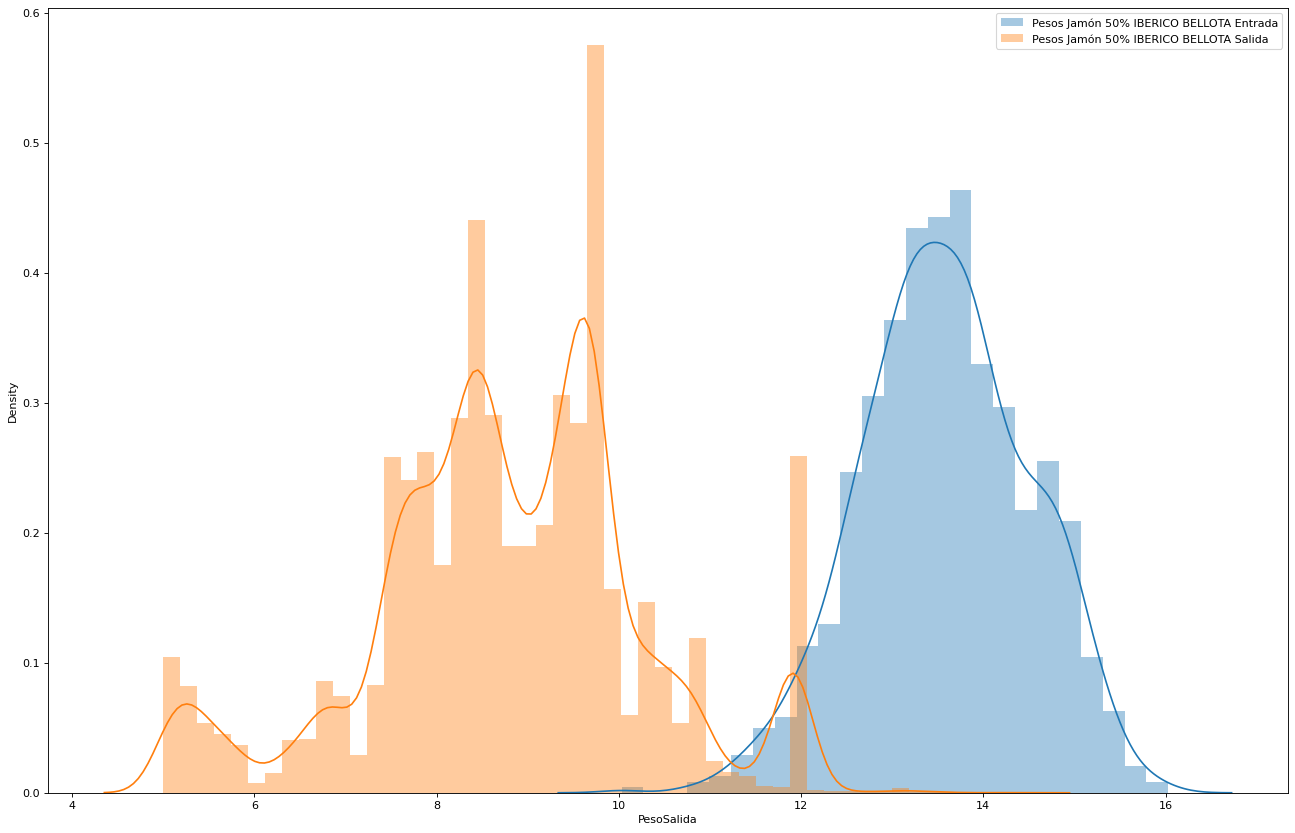

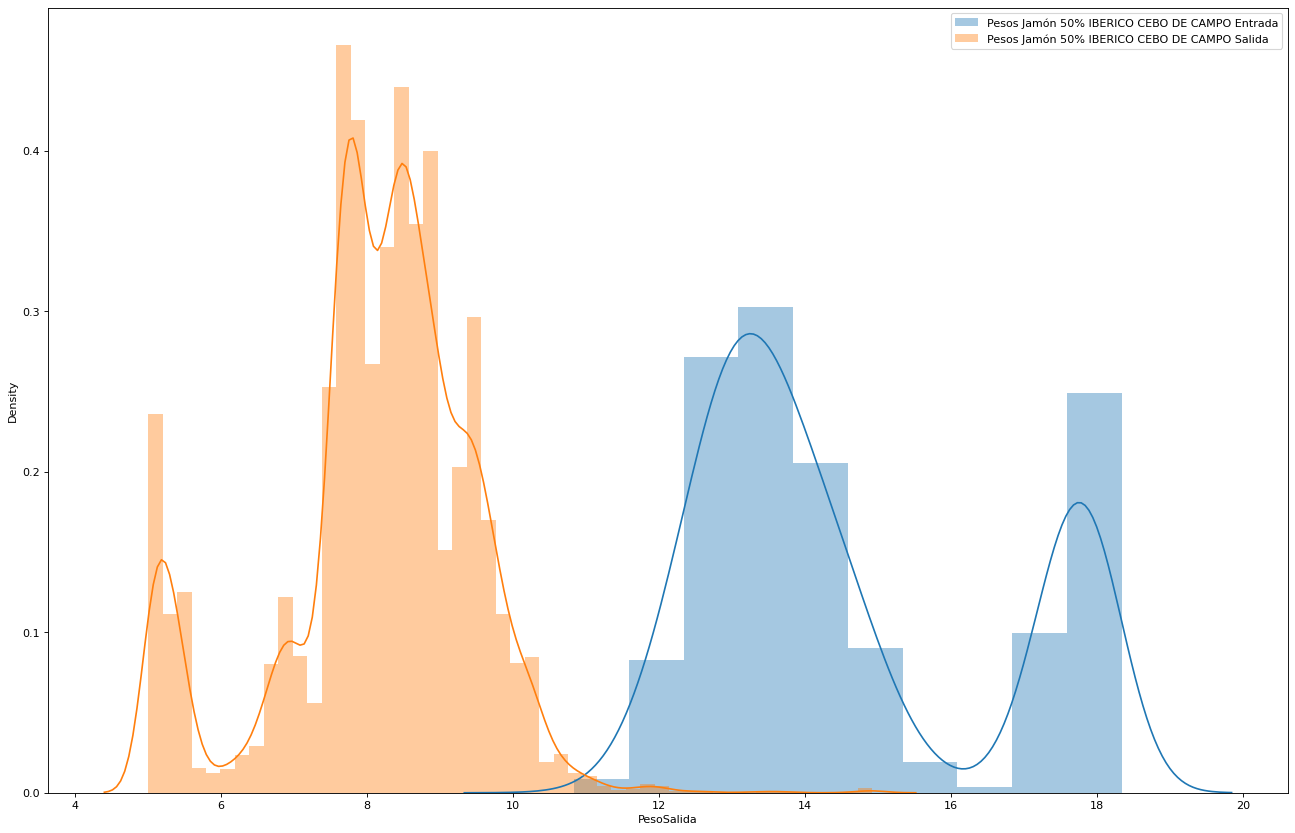

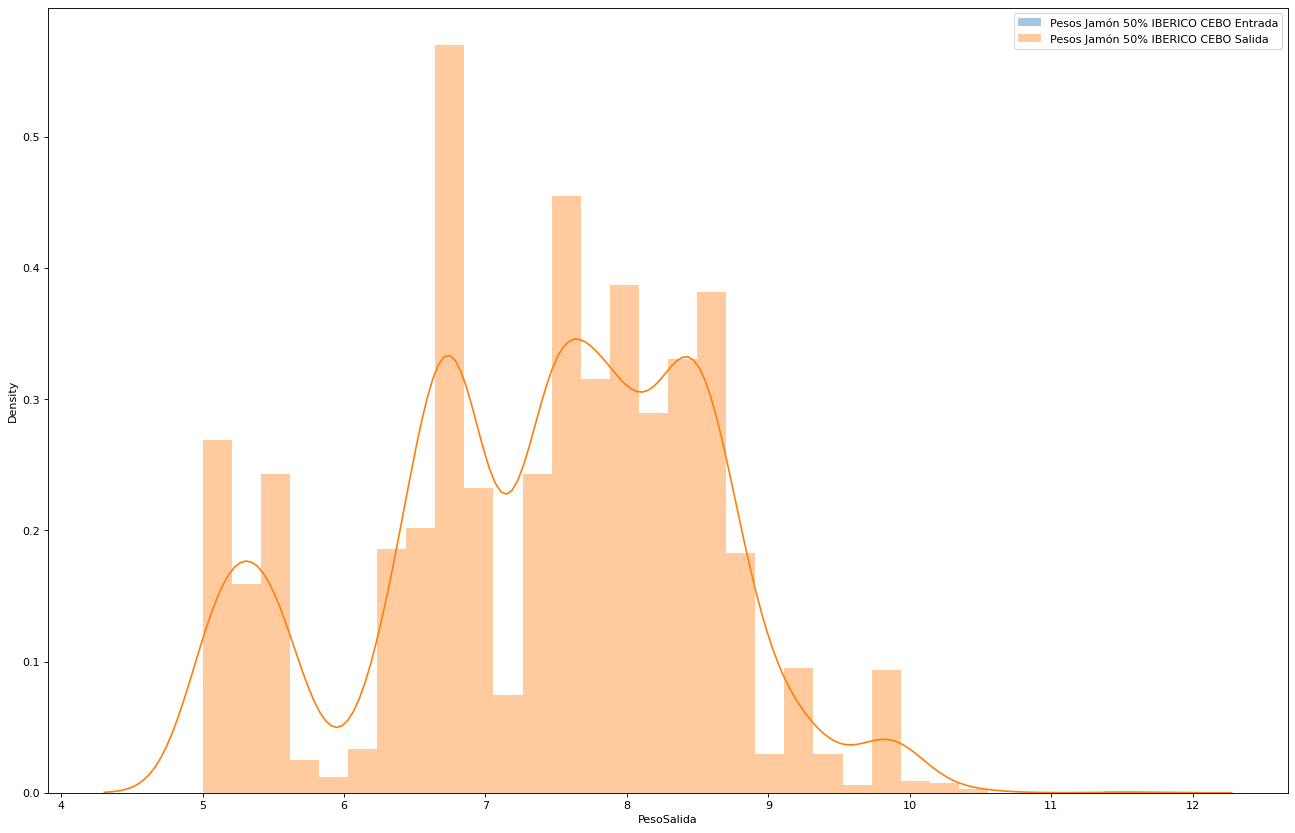

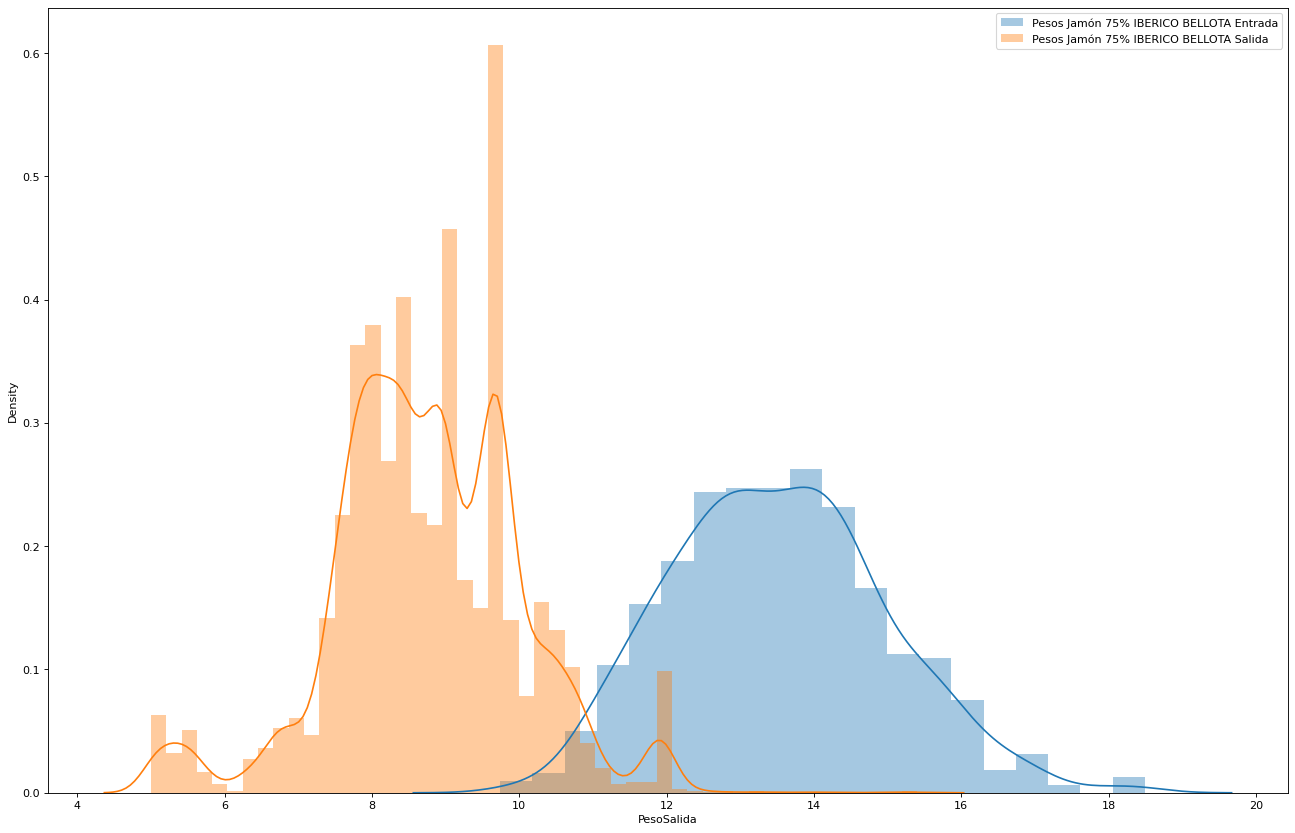

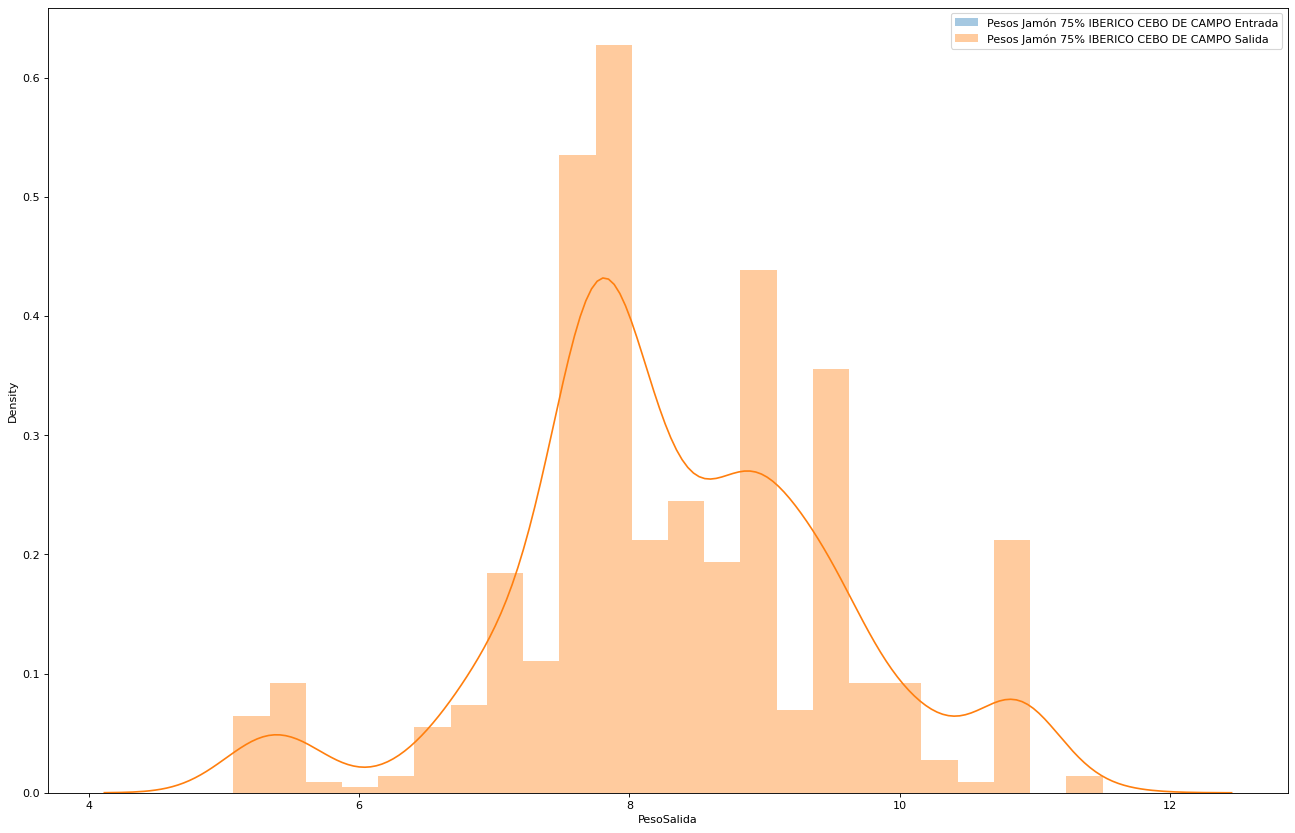

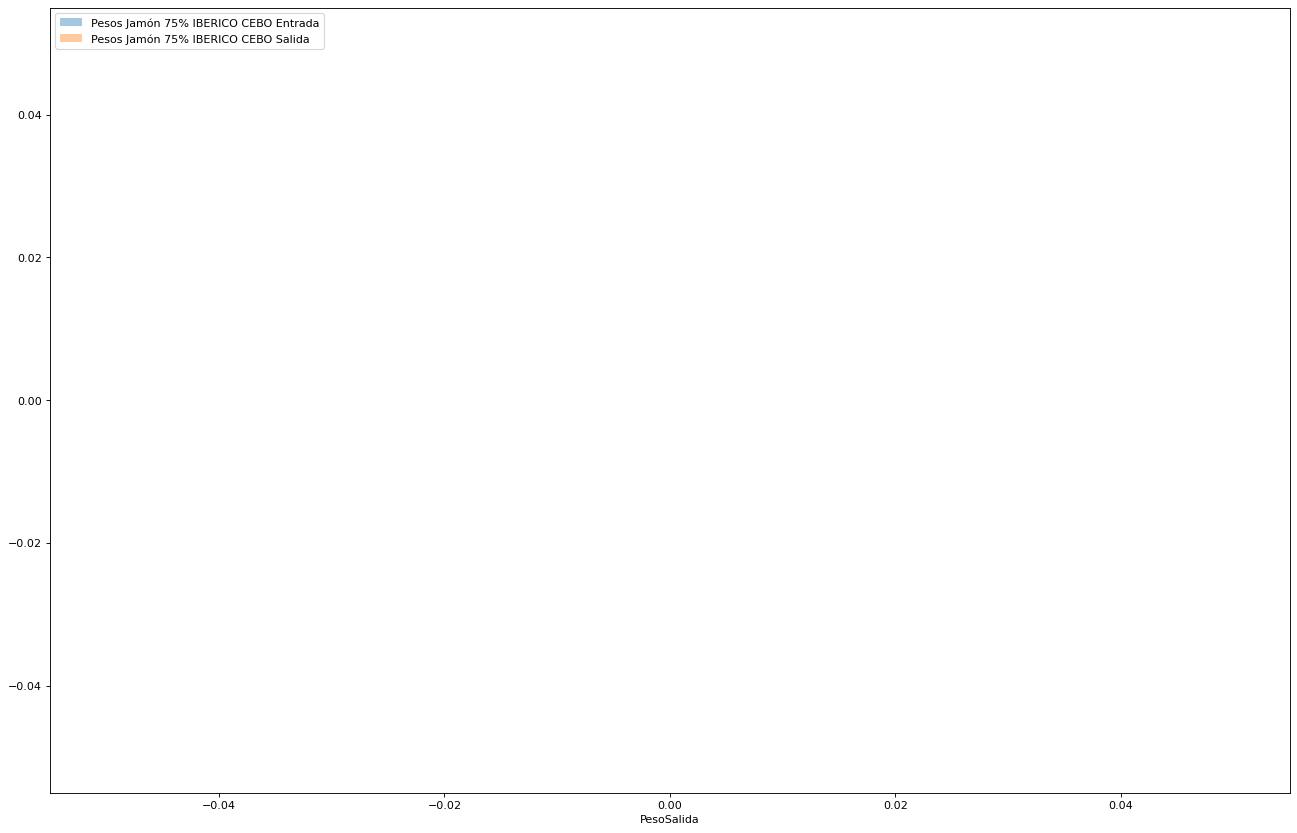

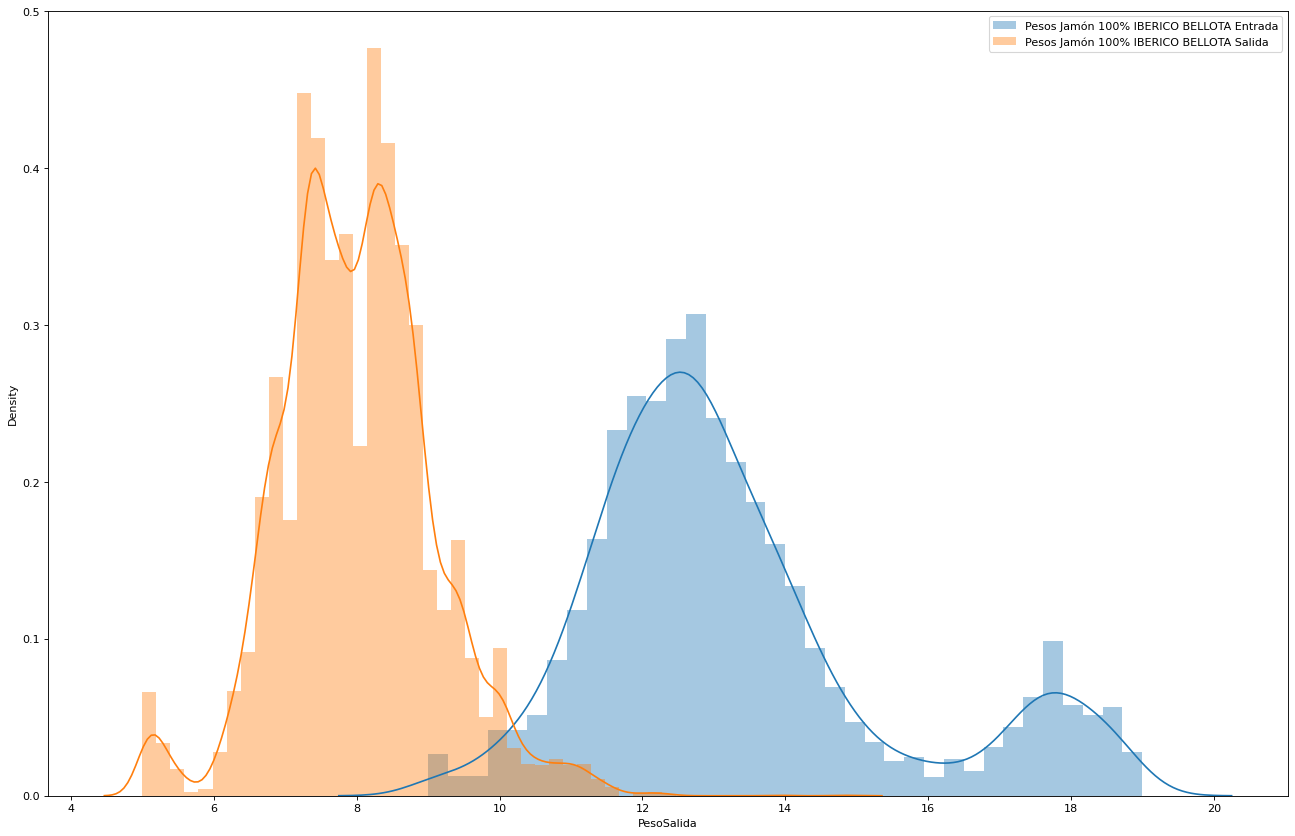

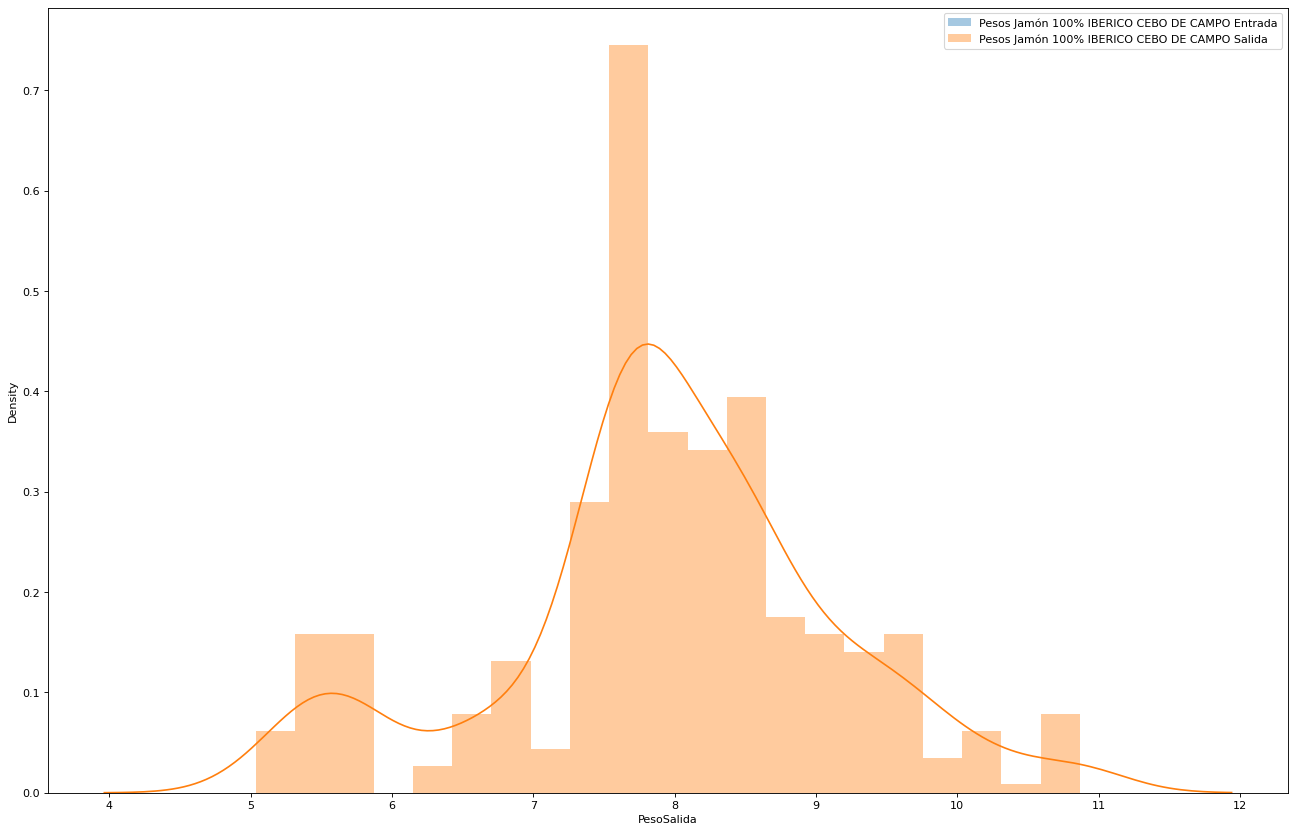

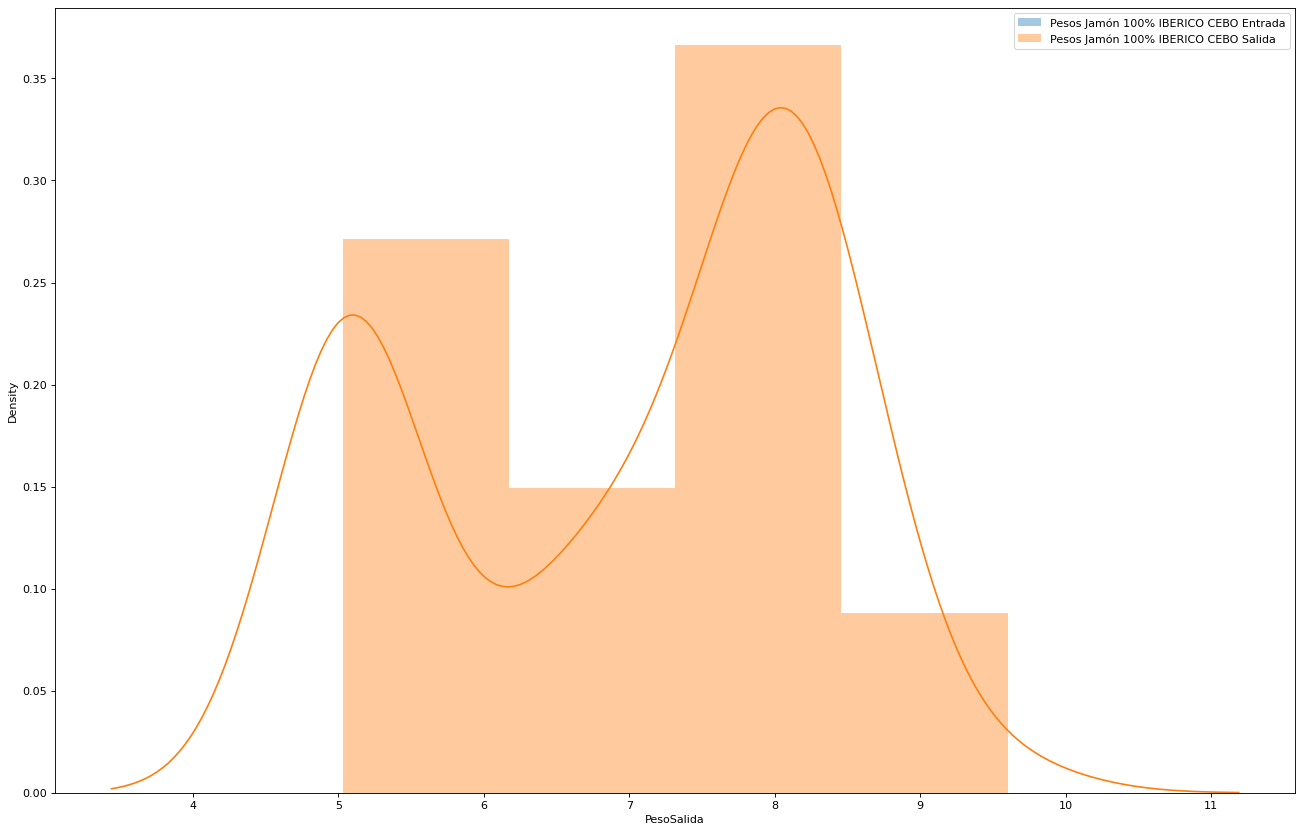

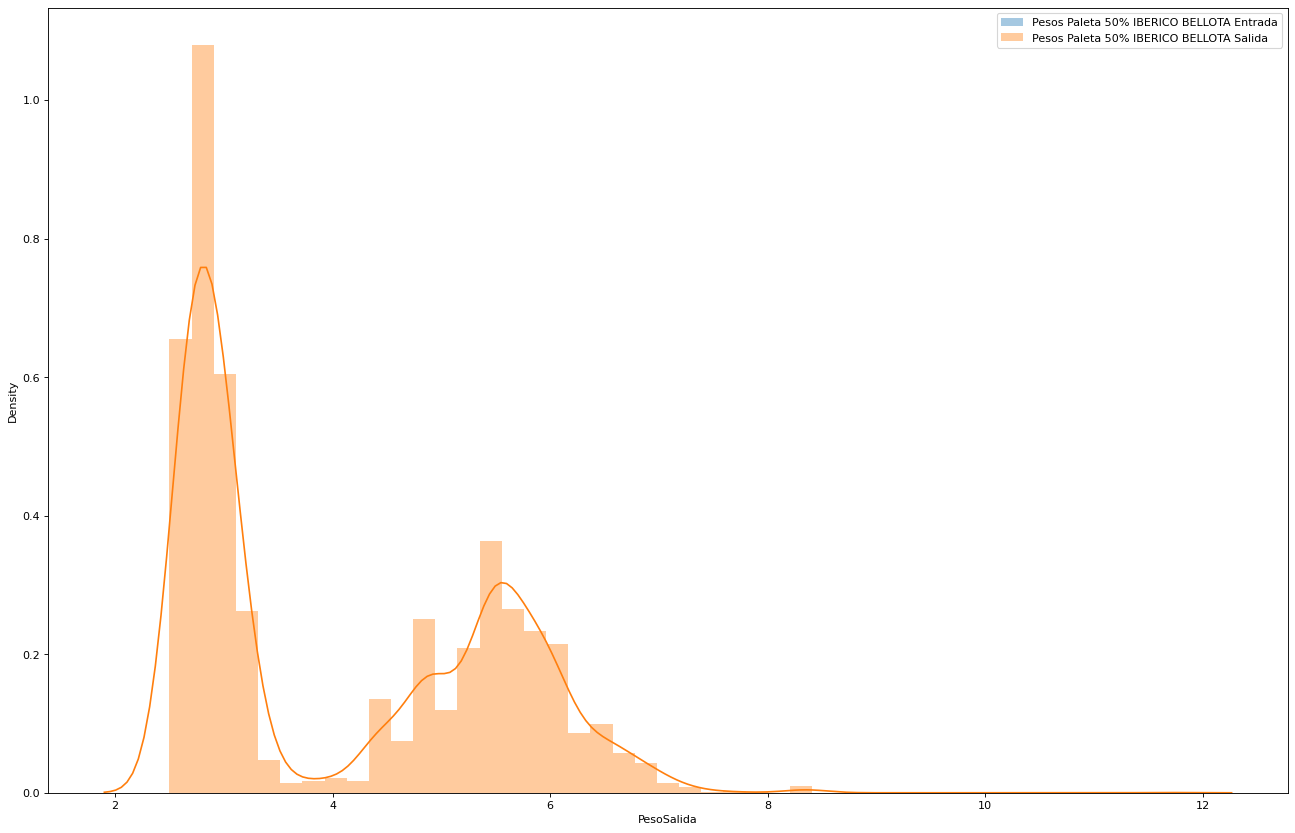

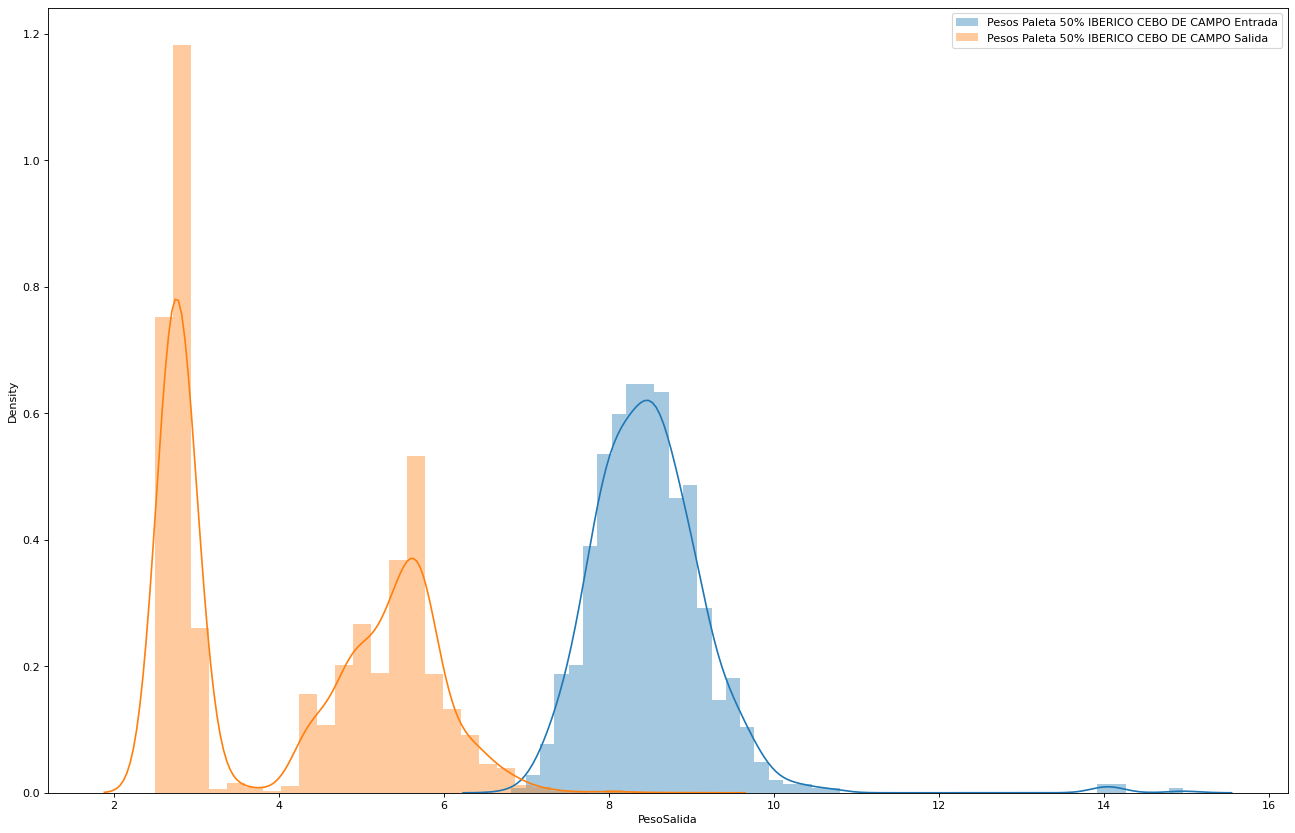

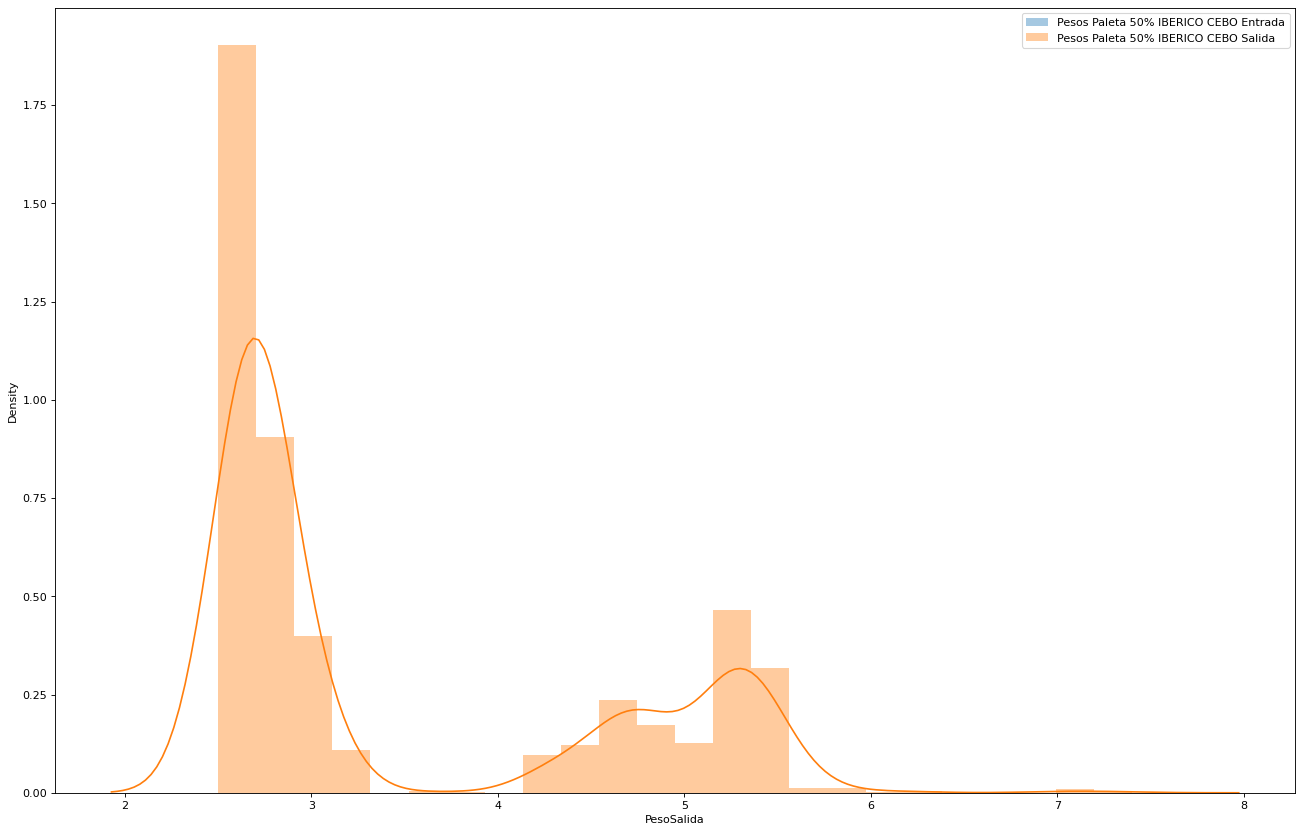

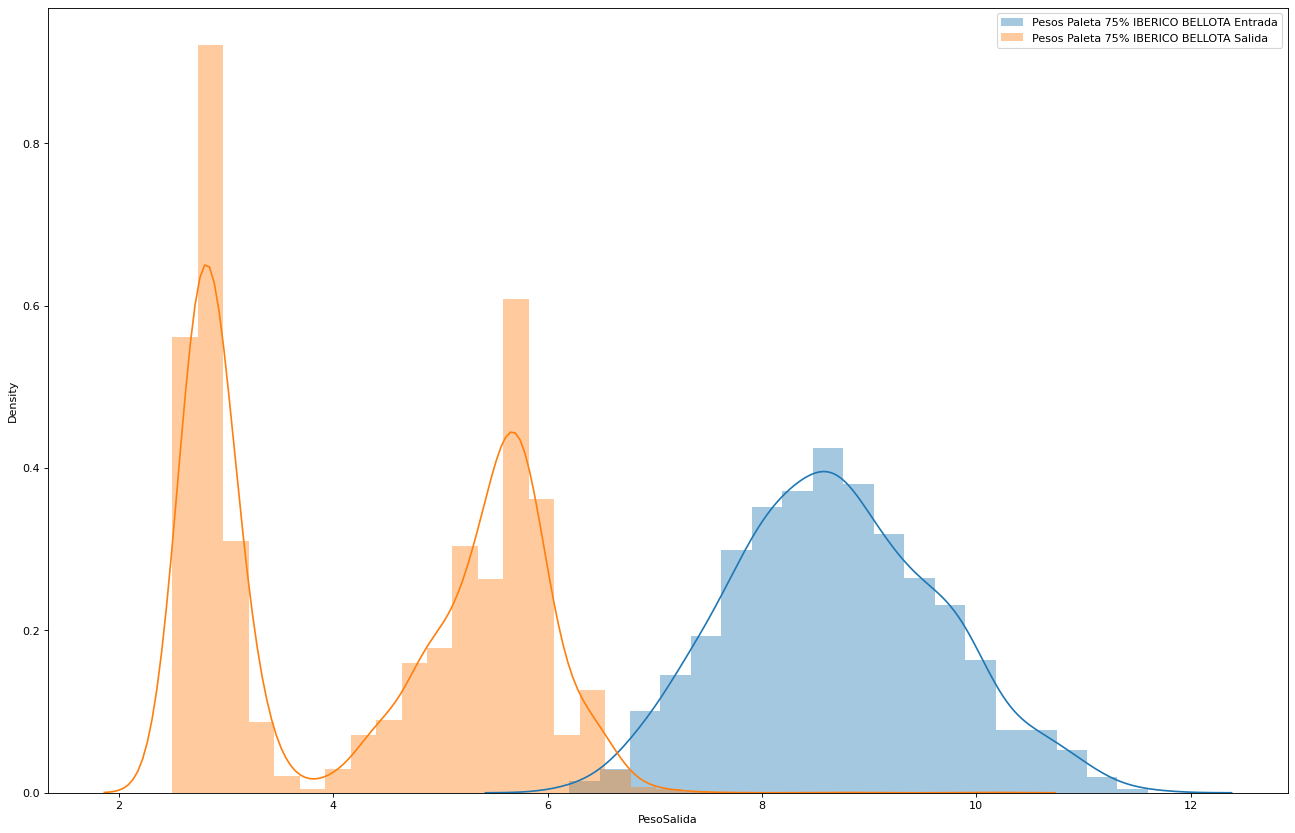

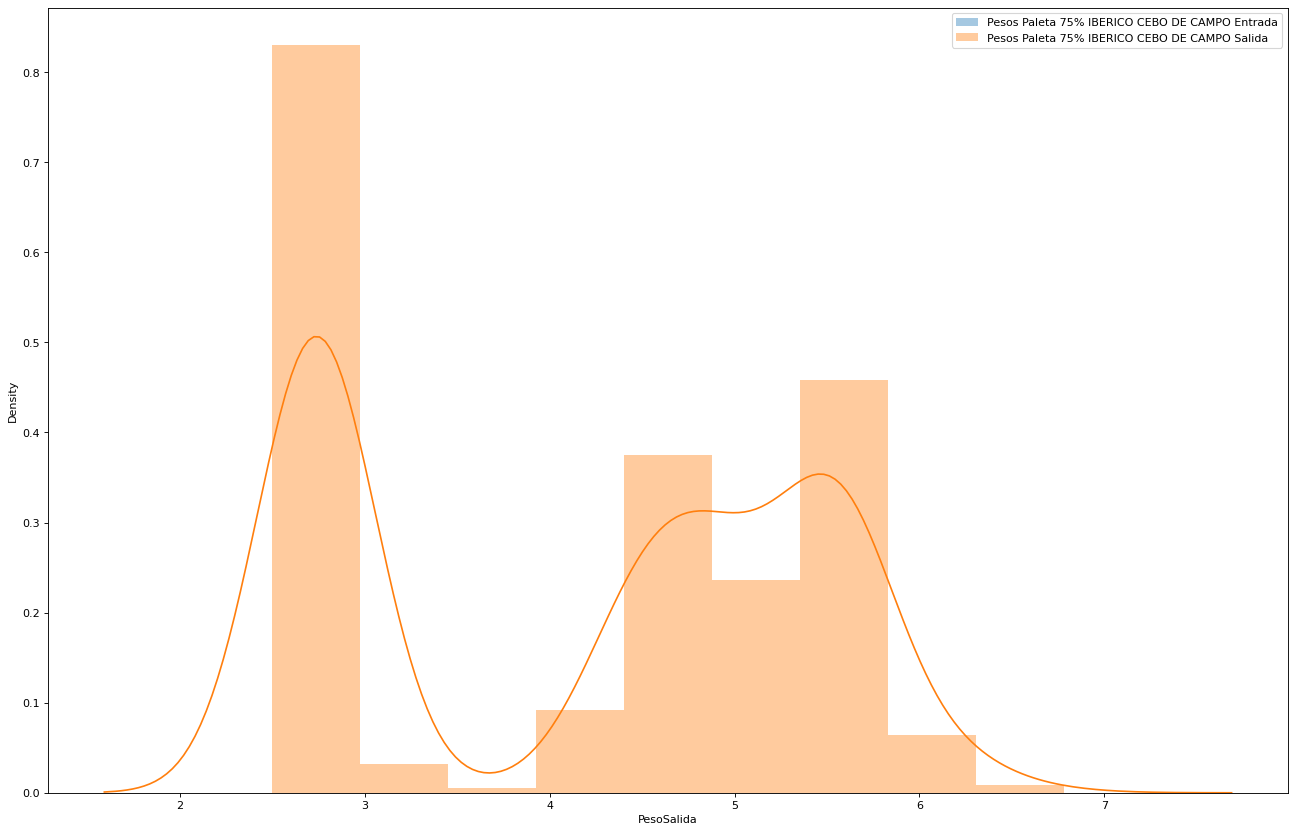

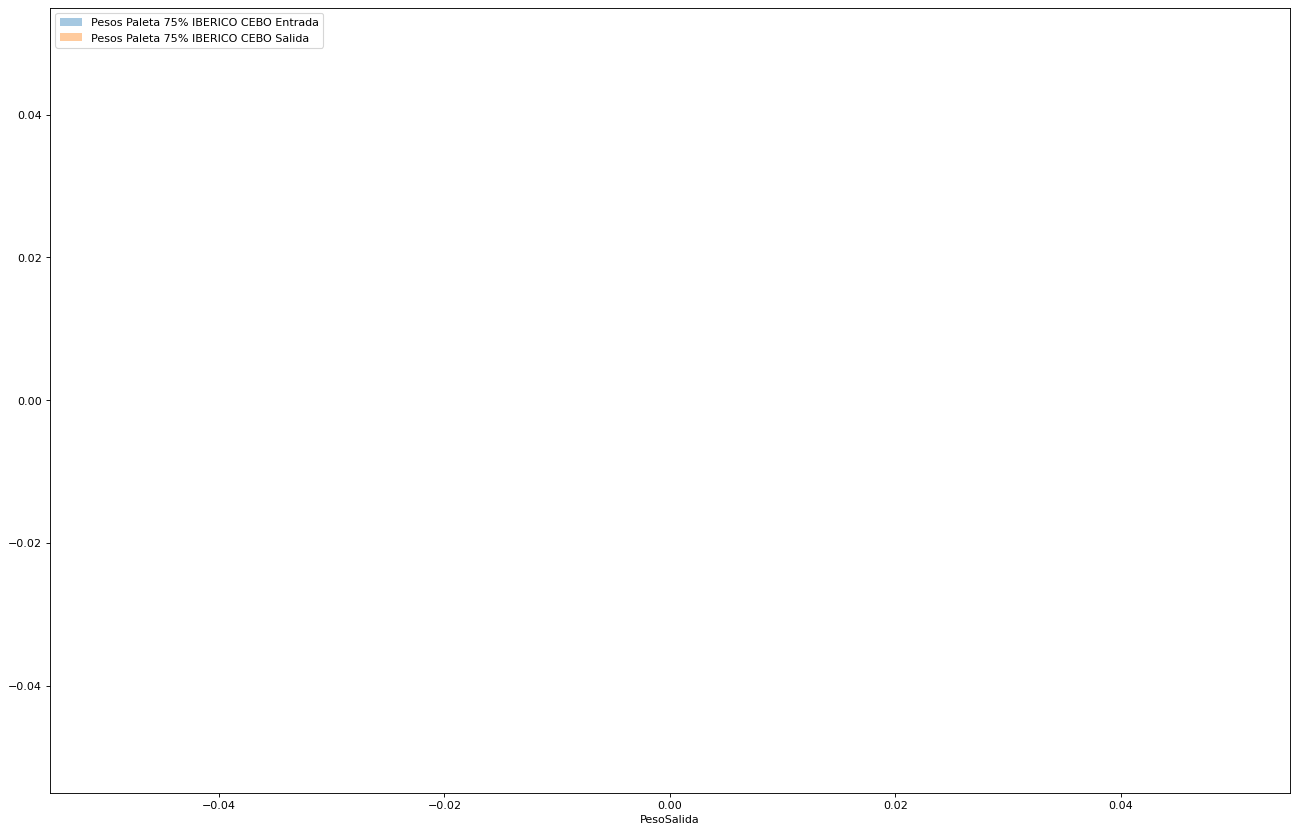

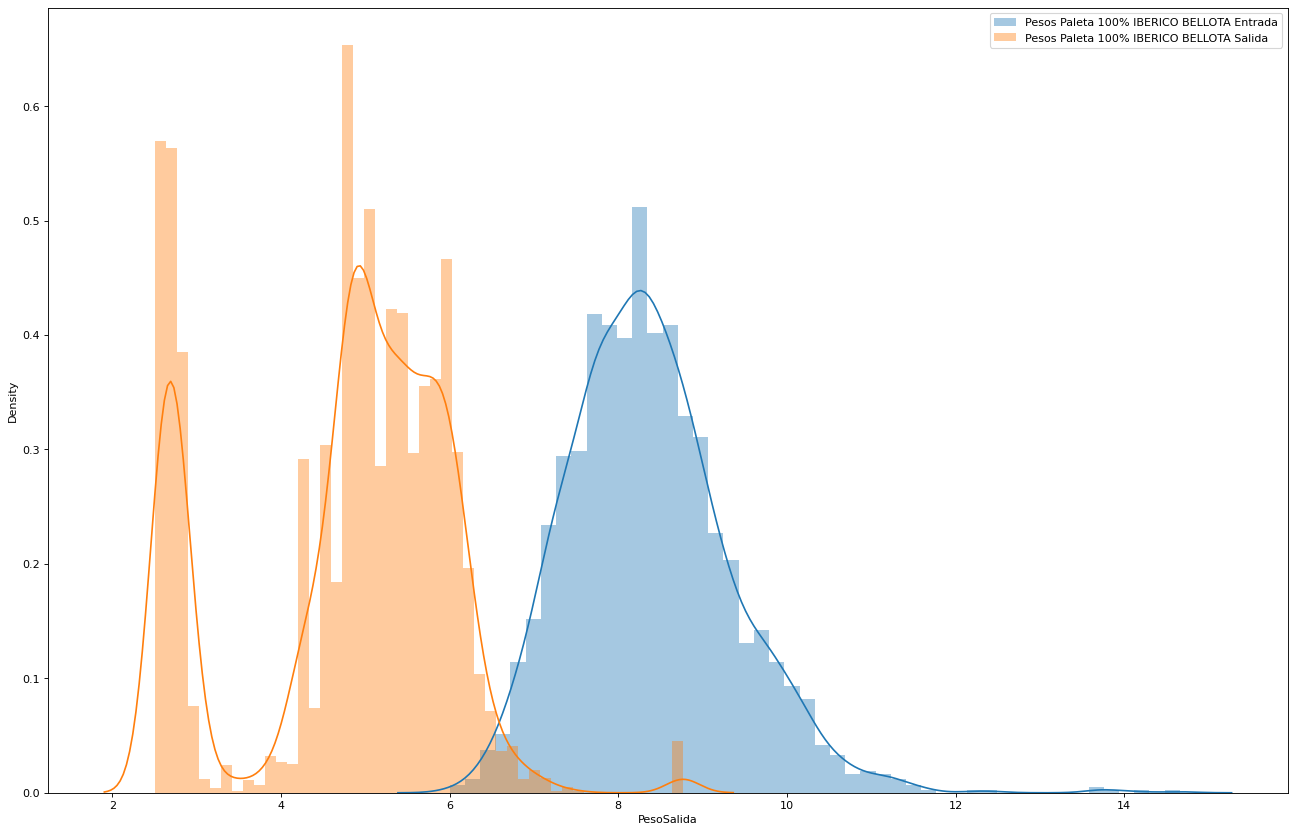

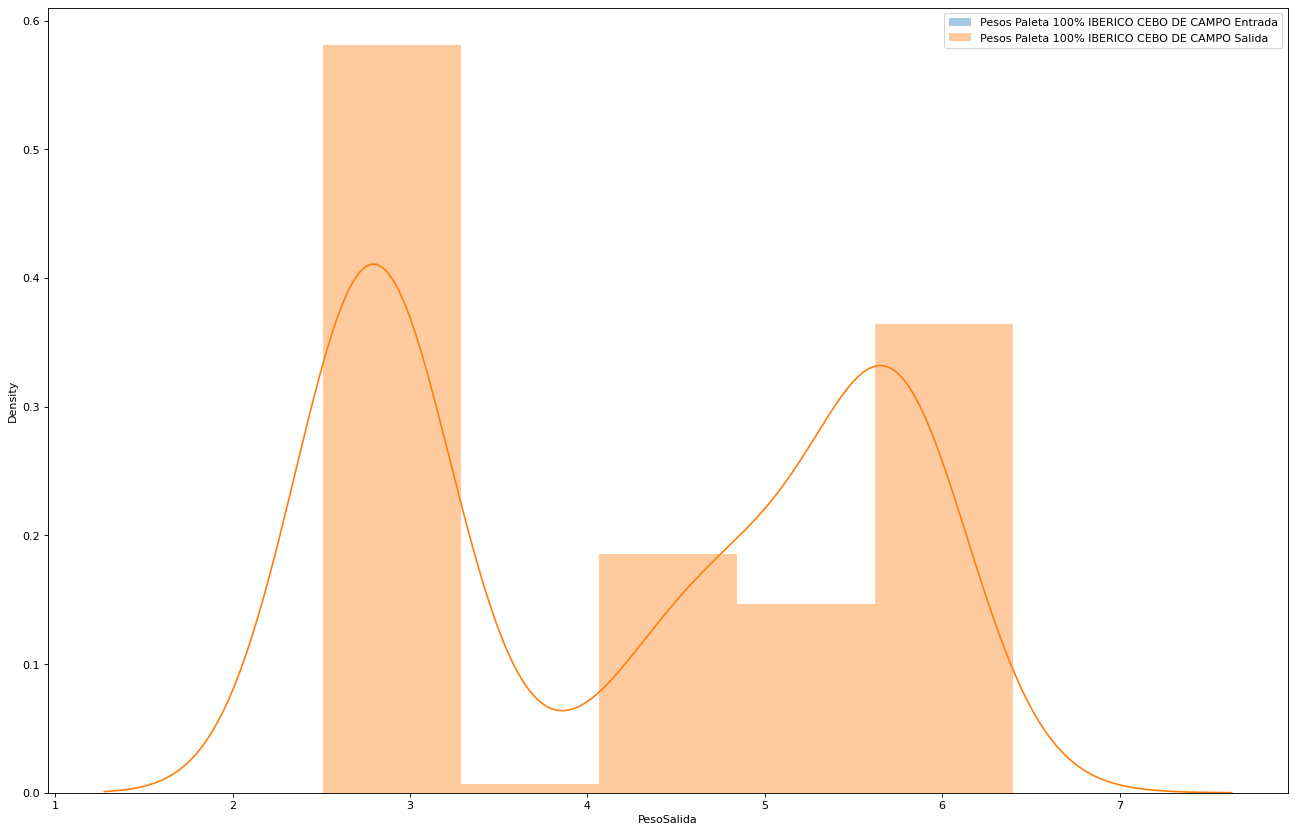

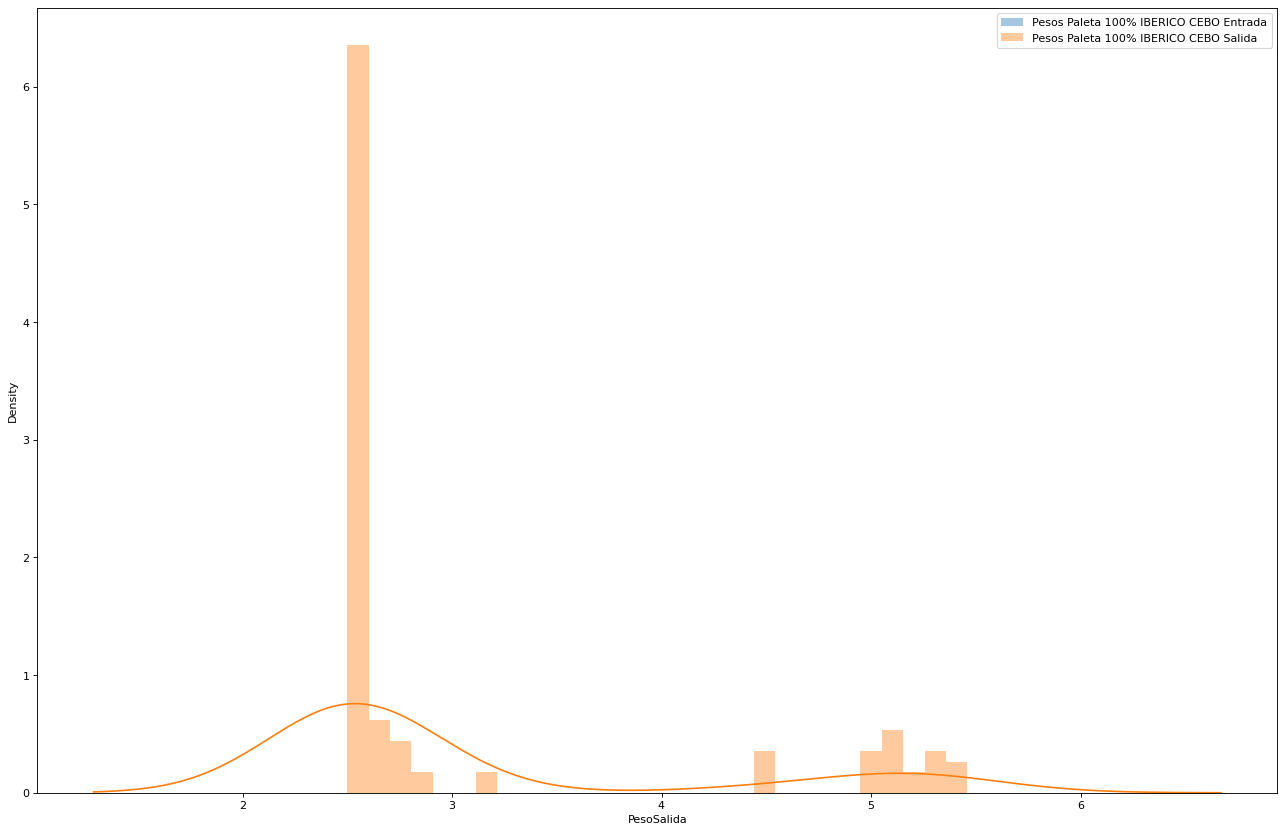

In [74]:
# PASO 4 WRONG DATA
# PesoEntradaEntrada -> todos los pesos grupales son calculados por media: los eliminaremos 
# y con la medias de entrada y salida y las sigmas (desv. típica) respectivas procederemos a
# introducir datos suficientes para correr el modelo de predicción.

# PesoSalida -> mantendremos los datos de salida de sin introducir para piezas con fechas
# de entrada de 2021 en adelante e intentaremos predecir las fechas de salida.

# Los pesos de entrada grupales son una media obtenida del peso total de la partida y el número de especimenes.
# Los eliminaremos ya que los valores son falsos y se podrían volver a calcular.

df_WngDt4 = df_WngDt3.copy()

# df_WngDt4[df_WngDt4["TipoArticuloEscandallo"]=="Jamón"].groupby("Añada").agg("count")
# df_WngDt4[df_WngDt4["TipoArticuloEscandallo"]=="Paleta"].groupby("Añada").agg("mean")

df_WngDt4["PesoEntradaEntrada"] = np.where (df_WngDt4['TipoPesada']=="Grupal", 0,df_WngDt4["PesoEntradaEntrada"])

df_WngDt4[~(( df_WngDt4["DescripcionArticulo"].str.contains("DESH", na=False)) | ( df_WngDt4["DescripcionArticulo"].str.contains("CAJA", na=False)) | ( df_WngDt4["DescripcionArticulo"].str.contains("MADERA", na=False)))]



Lpieza = []
Lraza = []
Lalimentacion = []
LmediaE = []
LmediaS = []
LdesvE = []
LdesvS = []
LcountE = []
LcountS = []

diccPieza = {}
diccPieza["Jamón"] = [[8, 20],[5, 16.4]]
diccPieza["Paleta"] = [[6, 15],[2.5, 12]]
# diccPieza["Jamón"] = [[8, 18],[5, 15]]
# diccPieza["Paleta"] = [[6, 12],[3, 9]]


for pieza in df_WngDt4["TipoArticuloEscandallo"].unique():
    for raza in df_WngDt4["Raza"].unique():
        for alimentacion in df_WngDt4["Alimentacion"].unique():
            mediaE = df_WngDt4["PesoEntradaEntrada"][(df_WngDt4['Alimentacion']==alimentacion)&(df_WngDt4['Raza']==raza)&(df_WngDt4['TipoPesada']=="Individual")&(df_WngDt4['TipoArticuloEscandallo']==pieza)&(df_WngDt4['PesoEntradaEntrada'].astype("float").between(diccPieza[pieza][0][0],diccPieza[pieza][0][1]))].mean()
            mediaS = df_WngDt4["PesoSalida"][(df_WngDt4['Alimentacion']==alimentacion)&(df_WngDt4['Raza']==raza)&(df_WngDt4['TipoArticuloEscandallo']==pieza)&(df_WngDt4['PesoSalida'].astype("float").between(diccPieza[pieza][1][0],diccPieza[pieza][1][1]))].mean()
            desvE = df_WngDt4["PesoEntradaEntrada"][(df_WngDt4['Alimentacion']==alimentacion)&(df_WngDt4['Raza']==raza)&(df_WngDt4['TipoPesada']=="Individual")&(df_WngDt4['TipoArticuloEscandallo']==pieza)&(df_WngDt4['PesoEntradaEntrada'].astype("float").between(diccPieza[pieza][0][0],diccPieza[pieza][0][1]))].std()
            desvS = df_WngDt4["PesoSalida"][(df_WngDt4['Alimentacion']==alimentacion)&(df_WngDt4['Raza']==raza)&(df_WngDt4['TipoArticuloEscandallo']==pieza)&(df_WngDt4['PesoSalida'].astype("float").between(diccPieza[pieza][1][0],diccPieza[pieza][1][1]))].std()
            countE = df_WngDt4["PesoEntradaEntrada"][(df_WngDt4['Alimentacion']==alimentacion)&(df_WngDt4['Raza']==raza)&(df_WngDt4['TipoPesada']=="Individual")&(df_WngDt4['TipoArticuloEscandallo']==pieza)&(df_WngDt4['PesoEntradaEntrada'].astype("float").between(diccPieza[pieza][0][0],diccPieza[pieza][0][1]))].count()
            countS = df_WngDt4["PesoSalida"][(df_WngDt4['Alimentacion']==alimentacion)&(df_WngDt4['Raza']==raza)&(df_WngDt4['TipoArticuloEscandallo']==pieza)&(df_WngDt4['PesoSalida'].astype("float").between(diccPieza[pieza][1][0],diccPieza[pieza][1][1]))].count()
            
            
            Lpieza.append(pieza)
            Lraza.append(raza)
            Lalimentacion.append(alimentacion)
            LmediaE.append(mediaE)
            LmediaS.append(mediaS)
            LdesvE.append(desvE)
            LdesvS.append(desvS)
            LcountE.append(countE)
            LcountS.append(countS)
            
            

            import seaborn
            import matplotlib.pyplot as plt
            fig= plt.subplots(figsize=(20,13), dpi= 80)
            seaborn.distplot(df_WngDt4["PesoEntradaEntrada"][(df_WngDt4['Alimentacion']==alimentacion)&(df_WngDt4['Raza']==raza)&(df_WngDt4['TipoPesada']=="Individual")&(df_WngDt4['TipoArticuloEscandallo']==pieza)&(df_WngDt4['PesoEntradaEntrada'].astype("float").between(diccPieza[pieza][0][0],diccPieza[pieza][0][1]))], label="Pesos %s %s %s Entrada" %(pieza, raza, alimentacion))
            seaborn.distplot(df_WngDt4["PesoSalida"][(df_WngDt4['Alimentacion']==alimentacion)&(df_WngDt4['Raza']==raza)&(df_WngDt4['TipoArticuloEscandallo']==pieza)&(df_WngDt4['PesoSalida'].astype("float").between(diccPieza[pieza][1][0],diccPieza[pieza][1][1]))], label="Pesos %s %s %s Salida" %(pieza, raza, alimentacion))
            plt.legend()
           
dicc = {'desc_pieza': Lpieza, 'desc_raza': Lraza, 'desc_alimentacion': Lalimentacion,'mediaE': LmediaE,'mediaS': LmediaS,'desvE': LdesvE,'desvS': LdesvS,'countE': LcountE,'countS': LcountS}
            
df_estadisticas = pd.DataFrame(data=dicc)
df_estadisticas

In [32]:
df_estadisticas["mermaMediaEn%"]=df_estadisticas["mediaS"]/df_estadisticas["mediaE"]
df_estadisticas



,desc_pieza,desc_raza,desc_alimentacion,mediaE,mediaS,desvE,desvS,countE,countS,mermaMedia,mermaMediaEn%
0,Jamón,50% IBERICO,BELLOTA,13.573591,8.771840,0.922091,1.490879,997,15809,0.353757,0.646243
1,Jamón,50% IBERICO,CEBO DE CAMPO,14.566961,8.146535,2.041577,1.319375,1109,12548,0.440753,0.559247
2,Jamón,50% IBERICO,CEBO,NaN,7.376669,NaN,1.171701,0,3327,NaN,NaN
3,Jamón,75% IBERICO,BELLOTA,13.522719,8.752222,1.467607,1.283555,730,8425,0.352776,0.647224
4,Jamón,75% IBERICO,CEBO DE CAMPO,NaN,8.332140,NaN,1.214692,0,809,NaN,NaN
5,Jamón,75% IBERICO,CEBO,NaN,NaN,NaN,NaN,0,0,NaN,NaN
6,Jamón,100% IBERICO,BELLOTA,13.276038,8.008213,2.115533,1.076807,3367,8245,0.396792,0.603208
7,Jamón,100% IBERICO,CEBO DE CAMPO,NaN,7.945968,NaN,1.193312,0,411,NaN,NaN
8,Jamón,100% IBERICO,CEBO,NaN,6.969473,NaN,1.399779,0,129,NaN,NaN
9,Paleta,50% IBERICO,BELLOTA,NaN,4.073082,NaN,1.421089,0,18328,NaN,NaN


In [75]:
df_estadisticas1 = df_estadisticas.copy()

df_estadisticas1.at[2, "mediaE"] = df_estadisticas1.at[2, "mediaS"]/0.56
df_estadisticas1.at[4, "mediaE"] = df_estadisticas1.at[4, "mediaS"]/0.56
df_estadisticas1.at[7, "mediaE"] = df_estadisticas1.at[7, "mediaS"]/0.56
df_estadisticas1.at[8, "mediaE"] = df_estadisticas1.at[8, "mediaS"]/0.56

df_estadisticas1.at[2, "desvE"] = 2
df_estadisticas1.at[4, "desvE"] = 2
df_estadisticas1.at[7, "desvE"] = 2
df_estadisticas1.at[8, "desvE"] = 2

df_estadisticas1.at[9, "mediaE"] = df_estadisticas1.at[9, "mediaS"]/0.49
df_estadisticas1.at[11, "mediaE"] = df_estadisticas1.at[11, "mediaS"]/0.49
df_estadisticas1.at[13, "mediaE"] = df_estadisticas1.at[13, "mediaS"]/0.49
df_estadisticas1.at[16, "mediaE"] = df_estadisticas1.at[16, "mediaS"]/0.49
df_estadisticas1.at[17, "mediaE"] = df_estadisticas1.at[17, "mediaS"]/0.49

df_estadisticas1.at[9, "desvE"] = 0.97
df_estadisticas1.at[11, "desvE"] = 0.97
df_estadisticas1.at[13, "desvE"] = 0.97
df_estadisticas1.at[16, "desvE"] = 0.97
df_estadisticas1.at[17, "desvE"] = 0.97
df_estadisticas1

,desc_pieza,desc_raza,desc_alimentacion,mediaE,mediaS,desvE,desvS,countE,countS
0,Jamón,50% IBERICO,BELLOTA,13.573591,8.771840,0.922091,1.490879,997,15809
1,Jamón,50% IBERICO,CEBO DE CAMPO,14.566961,8.146535,2.041577,1.319375,1109,12548
2,Jamón,50% IBERICO,CEBO,13.172623,7.376669,2.000000,1.171701,0,3327
3,Jamón,75% IBERICO,BELLOTA,13.522719,8.752222,1.467607,1.283555,730,8425
4,Jamón,75% IBERICO,CEBO DE CAMPO,14.878821,8.332140,2.000000,1.214692,0,809
5,Jamón,75% IBERICO,CEBO,NaN,NaN,NaN,NaN,0,0
6,Jamón,100% IBERICO,BELLOTA,13.276038,8.008213,2.115533,1.076807,3367,8245
7,Jamón,100% IBERICO,CEBO DE CAMPO,14.189229,7.945968,2.000000,1.193312,0,411
8,Jamón,100% IBERICO,CEBO,12.445487,6.969473,2.000000,1.399779,0,129
9,Paleta,50% IBERICO,BELLOTA,8.312413,4.073082,0.970000,1.421089,0,18328


In [ ]:
mediaS =df_estadisticas1["mediaS"][(df_estadisticas1["desc_pieza"]==df_WngDt4.at[index,"TipoArticuloEscandallo"])&(df_estadisticas1["desc_raza"]==df_WngDt4.at[index,"Raza"])&(df_estadisticas1["desc_alimentacion"]==df_WngDt4.at[index,"Alimentacion"])]
desvS =df_estadisticas1["desvS"][(df_estadisticas1["desc_pieza"]==df_WngDt4.at[index,"TipoArticuloEscandallo"])&(df_estadisticas1["desc_raza"]==df_WngDt4.at[index,"Raza"])&(df_estadisticas1["desc_alimentacion"]==df_WngDt4.at[index,"Alimentacion"])]

mediaE =df_estadisticas1["mediaE"][(df_estadisticas1["desc_pieza"]==df_WngDt4.at[index,"TipoArticuloEscandallo"])&(df_estadisticas1["desc_raza"]==df_WngDt4.at[index,"Raza"])&(df_estadisticas1["desc_alimentacion"]==df_WngDt4.at[index,"Alimentacion"])]
desvE =df_estadisticas1["desvE"][(df_estadisticas1["desc_pieza"]==df_WngDt4.at[index,"TipoArticuloEscandallo"])&(df_estadisticas1["desc_raza"]==df_WngDt4.at[index,"Raza"])&(df_estadisticas1["desc_alimentacion"]==df_WngDt4.at[index,"Alimentacion"])]



In [59]:
df_WngDt4.info()

,TipoArticuloEscandallo,Añada,Partida,Raza,Alimentacion,NumeroSerieLc,AcidoOleico,AcidoPalmitico,AcidoEstearico,AcidoLinoleico,...,PesoNetoCanal,Nacimiento,CodigoMatadero,NroAnimales,PesoEntradaEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Jamón,2014,102,50% IBERICO,BELLOTA,140100102008,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,NaN,Grupal,9.400,JAMÓN NO APTO PARA EL CONSUMO HUMANO,2014-01-13 00:00:00.000,2018-04-24 00:00:00.000
1,Jamón,2014,102,50% IBERICO,BELLOTA,140100102030,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,NaN,Grupal,10.400,JAMON DE BELLOTA IBERICO PASSION,2014-01-13 00:00:00.000,2018-06-04 00:00:00.000
2,Paleta,2014,102,50% IBERICO,BELLOTA,141100102051,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,NaN,Grupal,5.964,PALETA DE BELLOTA IBÉRICA D.O.,2014-01-13 00:00:00.000,2016-05-06 00:00:00.000
3,Paleta,2014,102,50% IBERICO,BELLOTA,141100102001,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,NaN,Grupal,3.150,PALETA DE BELLOTA IBÉRICA DESH.,2014-01-13 00:00:00.000,2016-12-01 00:00:00.000
4,Paleta,2014,102,50% IBERICO,BELLOTA,141100102155,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,NaN,Grupal,3.054,PALETA DE BELLOTA IB. D.O. DESH.,2014-01-13 00:00:00.000,2016-08-01 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158723,Paleta,2018,999,75% IBERICO,BELLOTA,237030576292,0.00,0.00,0.00,0.00,...,9649.962,10/05/2016,1,65,NaN,Grupal,6.383,PALETA DE BELLOTA IBÉRICA,2018-02-12 00:00:00.000,2021-04-13 00:00:00.000
158724,Paleta,2018,999,75% IBERICO,BELLOTA,237030576292,0.00,0.00,0.00,0.00,...,9649.962,10/05/2016,1,65,NaN,Grupal,3.160,PALETA DE BELLOTA IBÉRICA,2018-02-12 00:00:00.000,2021-04-13 00:00:00.000
158725,Paleta,2018,999,75% IBERICO,BELLOTA,237030576292,0.00,0.00,0.00,0.00,...,9649.962,10/05/2016,1,65,NaN,Grupal,6.383,PALETA DE BELLOTA IBÉRICA DESH.,2018-02-12 00:00:00.000,2021-04-16 00:00:00.000
158726,Paleta,2018,999,75% IBERICO,BELLOTA,237030576292,0.00,0.00,0.00,0.00,...,9649.962,10/05/2016,1,65,NaN,Grupal,3.160,PALETA DE BELLOTA IBÉRICA DESH.,2018-02-12 00:00:00.000,2021-04-16 00:00:00.000


In [95]:
df_WngDt4[df_WngDt4["PesoEntradaEntrada"]==0].info()
df_WngDt4[df_WngDt4["PesoSalida"]!=0].info()
df_WngDt4[df_WngDt4["TipoPesada"]=="Grupal"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140284 entries, 0 to 158727
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TipoArticuloEscandallo  140284 non-null  object 
 1   Añada                   140284 non-null  int64  
 2   Partida                 140284 non-null  int64  
 3   Raza                    140284 non-null  object 
 4   Alimentacion            140284 non-null  object 
 5   NumeroSerieLc           140284 non-null  int64  
 6   AcidoOleico             140284 non-null  float64
 7   AcidoPalmitico          140284 non-null  float64
 8   AcidoEstearico          140284 non-null  float64
 9   AcidoLinoleico          140284 non-null  float64
 10  PesoVarios              140284 non-null  float64
 11  Pesovientres            140284 non-null  float64
 12  PesoCerdos              140284 non-null  float64
 13  PesoNetoCanal           140284 non-null  float64
 14  Nacimiento          

In [100]:
df_WngDt5 = df_WngDt4.copy()

listCondicion = (df_WngDt5["TipoPesada"] == "Grupal")&(df_WngDt5["PesoSalida"]!=0)&(df_WngDt5["PesoEntradaEntrada"]==0)
n = 1
for index, value in zip(df_WngDt5.index, listCondicion):
    
    if listCondicion[index]==True:
        
        mediaS =df_estadisticas1["mediaS"][(df_estadisticas1["desc_pieza"]==df_WngDt5.at[index,"TipoArticuloEscandallo"])&(df_estadisticas1["desc_raza"]==df_WngDt5.at[index,"Raza"])&(df_estadisticas1["desc_alimentacion"]==df_WngDt5.at[index,"Alimentacion"])]
        desvS =df_estadisticas1["desvS"][(df_estadisticas1["desc_pieza"]==df_WngDt5.at[index,"TipoArticuloEscandallo"])&(df_estadisticas1["desc_raza"]==df_WngDt5.at[index,"Raza"])&(df_estadisticas1["desc_alimentacion"]==df_WngDt5.at[index,"Alimentacion"])]

        mediaE =df_estadisticas1["mediaE"][(df_estadisticas1["desc_pieza"]==df_WngDt5.at[index,"TipoArticuloEscandallo"])&(df_estadisticas1["desc_raza"]==df_WngDt5.at[index,"Raza"])&(df_estadisticas1["desc_alimentacion"]==df_WngDt5.at[index,"Alimentacion"])]
        desvE =df_estadisticas1["desvE"][(df_estadisticas1["desc_pieza"]==df_WngDt5.at[index,"TipoArticuloEscandallo"])&(df_estadisticas1["desc_raza"]==df_WngDt5.at[index,"Raza"])&(df_estadisticas1["desc_alimentacion"]==df_WngDt5.at[index,"Alimentacion"])]
        
        
        df_WngDt5.at[index,"PesoEntradaEntrada"] = mediaE + (df_WngDt5.at[index,"PesoSalida"]-mediaS)/desvS*desvE
        print("", end=f"\r  %d Valores rellenado" %(n))
        n+=1   
df_WngDt5        

  131451 Valores rellenado

,TipoArticuloEscandallo,Añada,Partida,Raza,Alimentacion,NumeroSerieLc,AcidoOleico,AcidoPalmitico,AcidoEstearico,AcidoLinoleico,...,PesoNetoCanal,Nacimiento,CodigoMatadero,NroAnimales,PesoEntradaEntrada,TipoPesada,PesoSalida,DescripcionArticulo,FechaEntrada,FechaSalida
0,Jamón,2014,102,50% IBERICO,BELLOTA,140100102008,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,13.962100,Grupal,9.400,JAMÓN NO APTO PARA EL CONSUMO HUMANO,2014-01-13 00:00:00.000,2018-04-24 00:00:00.000
1,Jamón,2014,102,50% IBERICO,BELLOTA,140100102030,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,14.580588,Grupal,10.400,JAMON DE BELLOTA IBERICO PASSION,2014-01-13 00:00:00.000,2018-06-04 00:00:00.000
2,Paleta,2014,102,50% IBERICO,BELLOTA,141100102051,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,9.603106,Grupal,5.964,PALETA DE BELLOTA IBÉRICA D.O.,2014-01-13 00:00:00.000,2016-05-06 00:00:00.000
3,Paleta,2014,102,50% IBERICO,BELLOTA,141100102001,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,7.682340,Grupal,3.150,PALETA DE BELLOTA IBÉRICA DESH.,2014-01-13 00:00:00.000,2016-12-01 00:00:00.000
4,Paleta,2014,102,50% IBERICO,BELLOTA,141100102155,53.76,21.02,10.61,8.11,...,16351.398,NaN,1,117,7.616813,Grupal,3.054,PALETA DE BELLOTA IB. D.O. DESH.,2014-01-13 00:00:00.000,2016-08-01 00:00:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158723,Paleta,2018,999,75% IBERICO,BELLOTA,237030576292,0.00,0.00,0.00,0.00,...,9649.962,10/05/2016,1,65,10.149980,Grupal,6.383,PALETA DE BELLOTA IBÉRICA,2018-02-12 00:00:00.000,2021-04-13 00:00:00.000
158724,Paleta,2018,999,75% IBERICO,BELLOTA,237030576292,0.00,0.00,0.00,0.00,...,9649.962,10/05/2016,1,65,7.885824,Grupal,3.160,PALETA DE BELLOTA IBÉRICA,2018-02-12 00:00:00.000,2021-04-13 00:00:00.000
158725,Paleta,2018,999,75% IBERICO,BELLOTA,237030576292,0.00,0.00,0.00,0.00,...,9649.962,10/05/2016,1,65,10.149980,Grupal,6.383,PALETA DE BELLOTA IBÉRICA DESH.,2018-02-12 00:00:00.000,2021-04-16 00:00:00.000
158726,Paleta,2018,999,75% IBERICO,BELLOTA,237030576292,0.00,0.00,0.00,0.00,...,9649.962,10/05/2016,1,65,7.885824,Grupal,3.160,PALETA DE BELLOTA IBÉRICA DESH.,2018-02-12 00:00:00.000,2021-04-16 00:00:00.000


C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danny\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

,desc_pieza,desc_raza,desc_alimentacion,mediaE,mediaS,desvE,desvS,countE,countS
0,Jamón,50% IBERICO,BELLOTA,13.373533,8.771840,1.131500,1.490879,18180,15809
1,Jamón,50% IBERICO,CEBO DE CAMPO,13.896789,8.146535,2.605756,1.319375,15122,12548
2,Jamón,50% IBERICO,CEBO,12.098611,7.376669,2.653588,1.171701,4298,3327
3,Jamón,75% IBERICO,BELLOTA,13.412402,8.752222,1.611136,1.283555,9363,8425
4,Jamón,75% IBERICO,CEBO DE CAMPO,14.502885,8.332140,2.412333,1.214692,861,809
5,Jamón,75% IBERICO,CEBO,NaN,NaN,NaN,NaN,0,0
6,Jamón,100% IBERICO,BELLOTA,13.331487,8.008213,1.998563,1.076807,11440,8245
7,Jamón,100% IBERICO,CEBO DE CAMPO,13.507273,7.945968,2.637339,1.193312,467,411
8,Jamón,100% IBERICO,CEBO,11.370696,6.969473,2.337521,1.399779,185,129
9,Paleta,50% IBERICO,BELLOTA,8.143238,4.073082,1.037967,1.421089,20749,18328


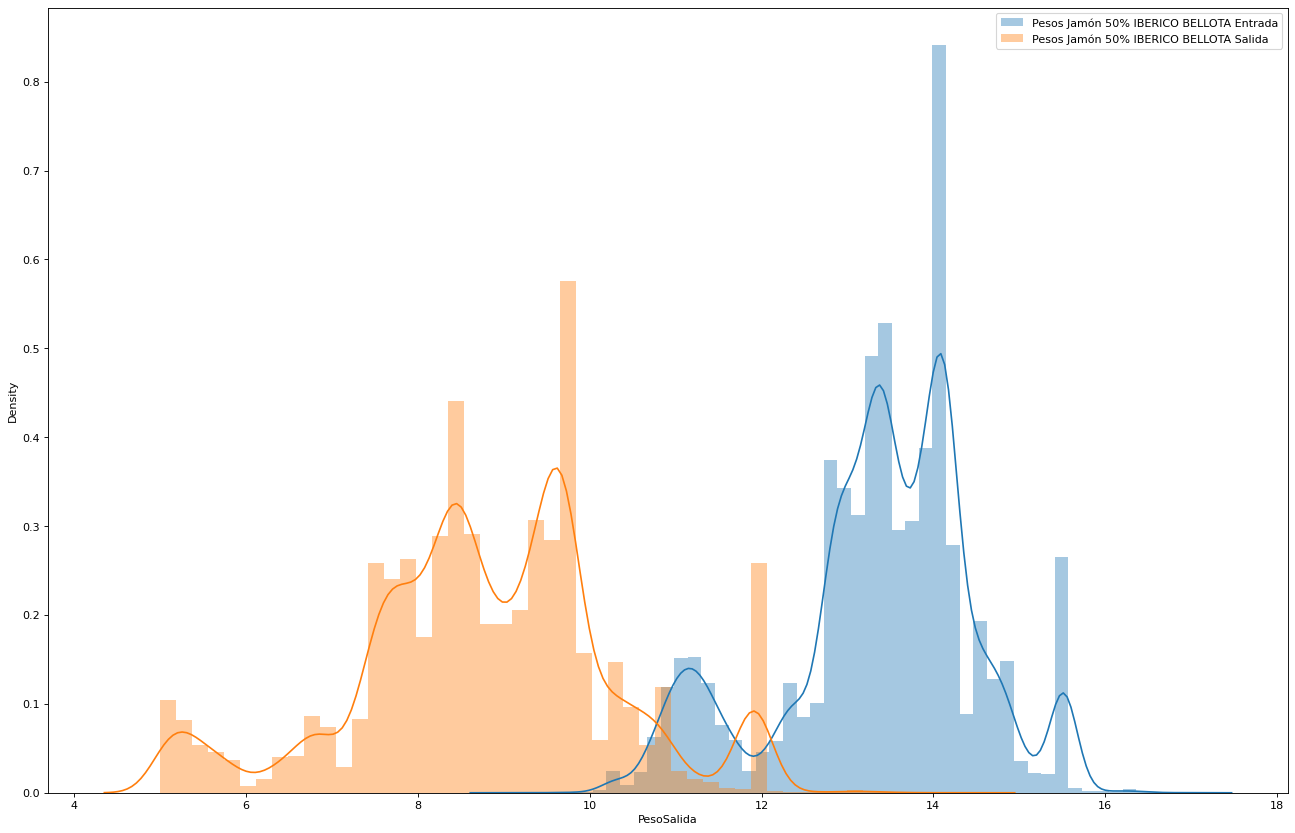

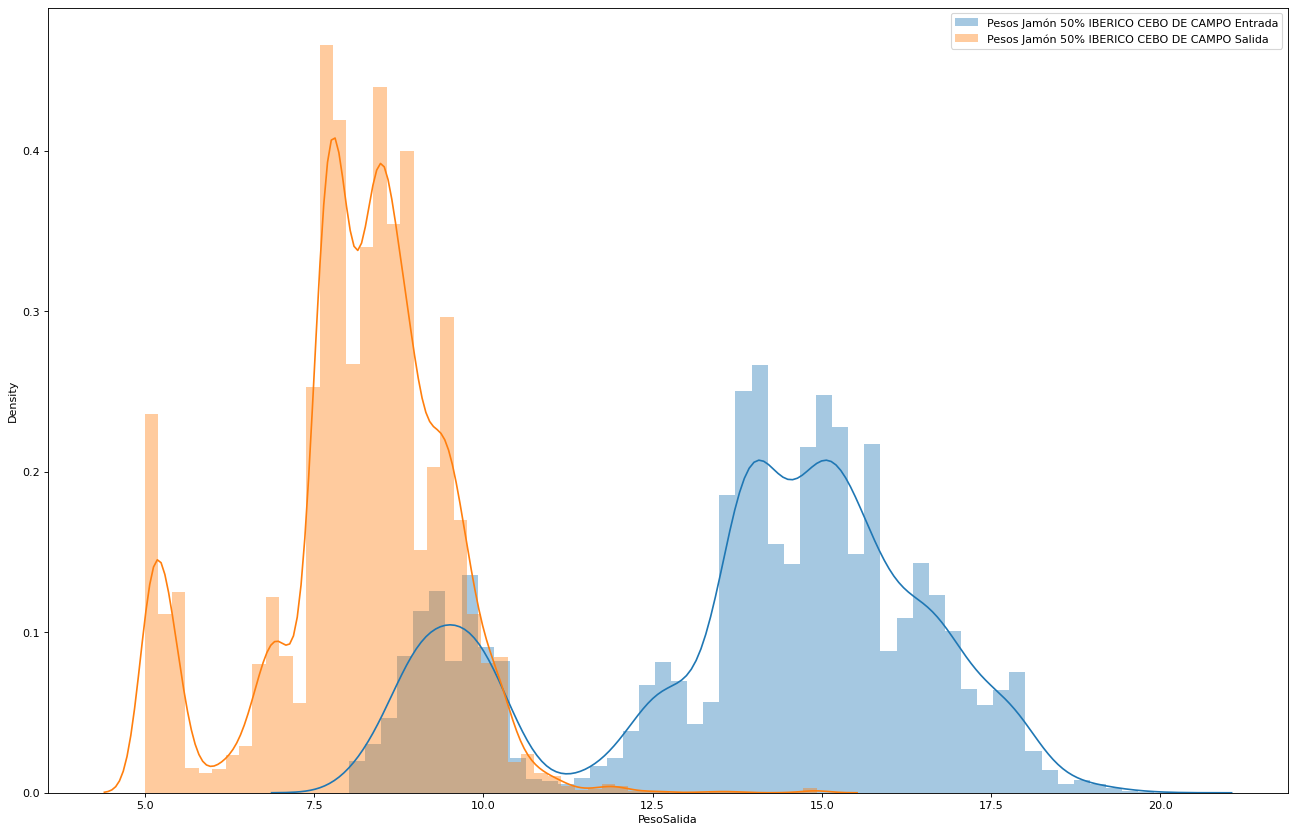

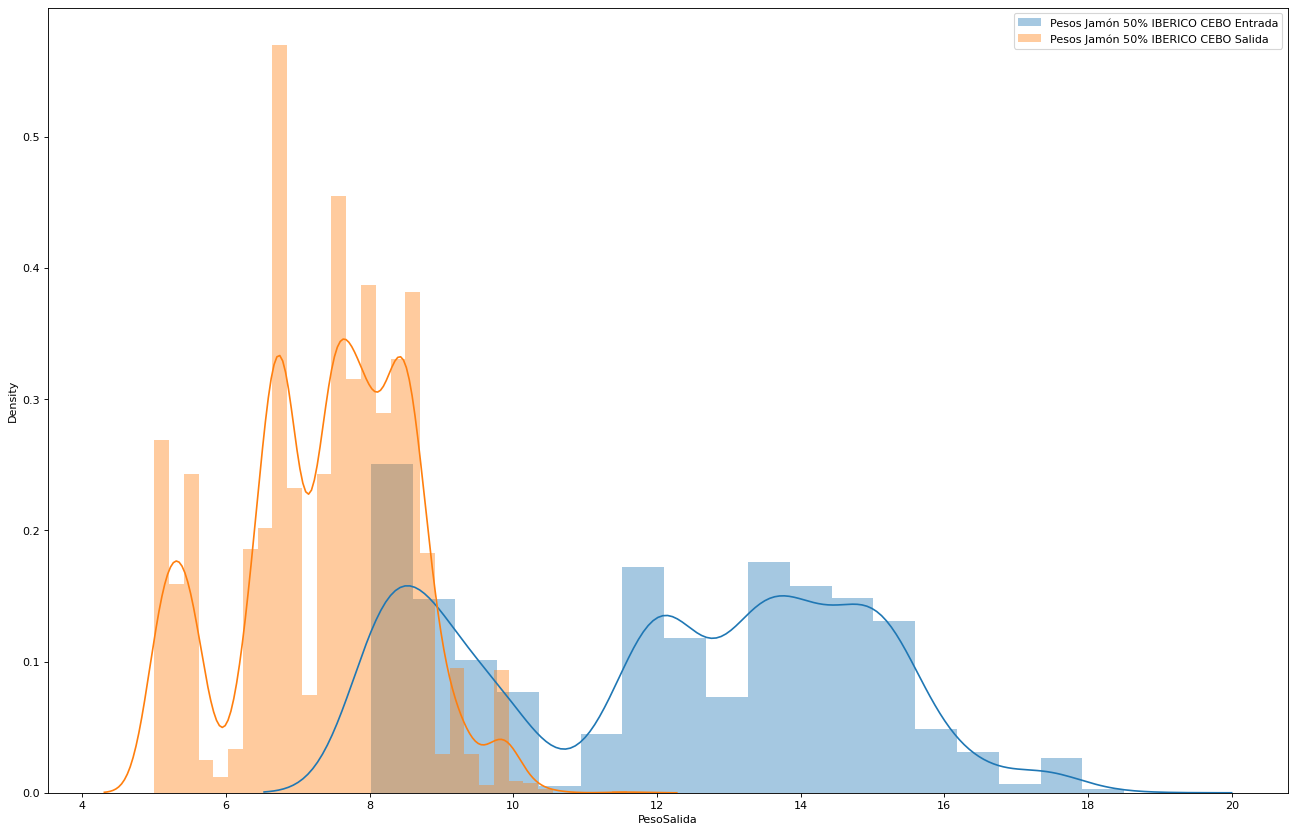

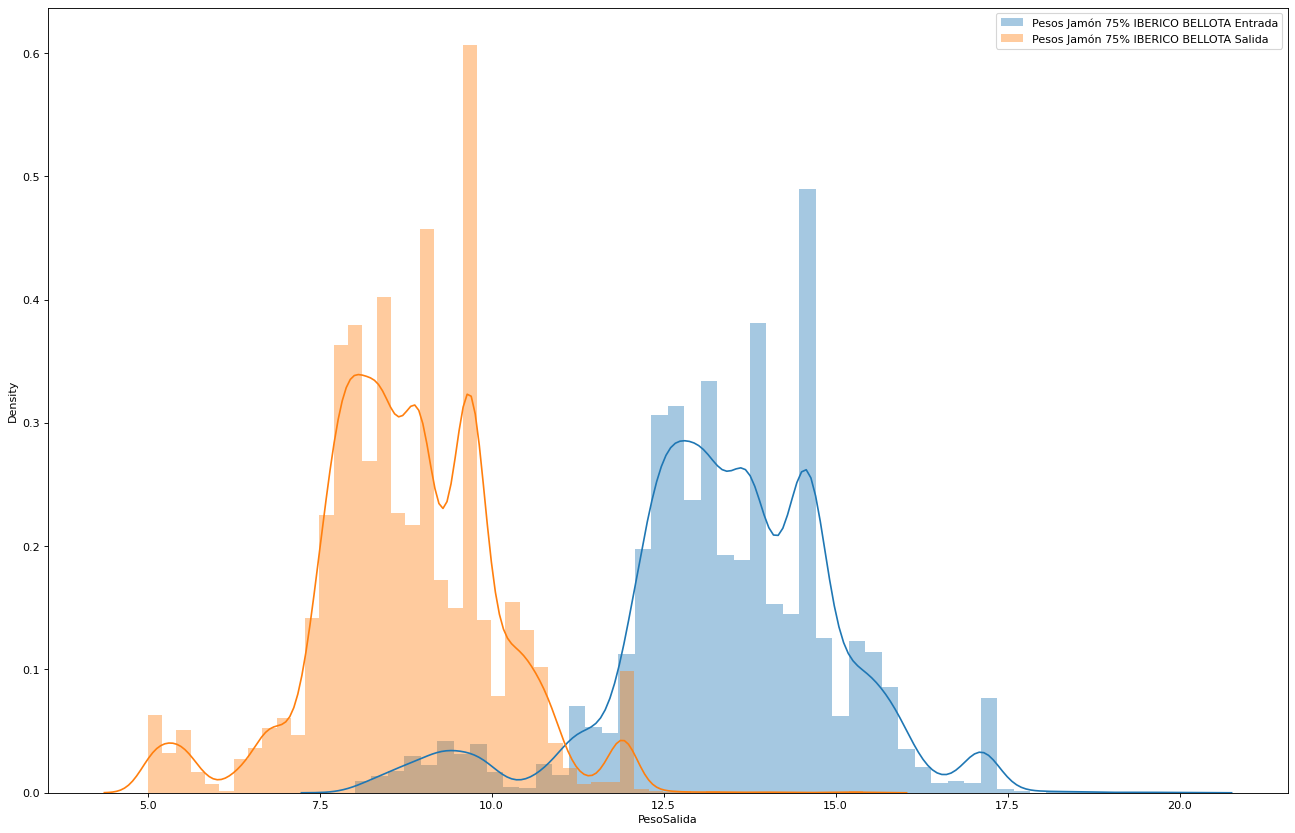

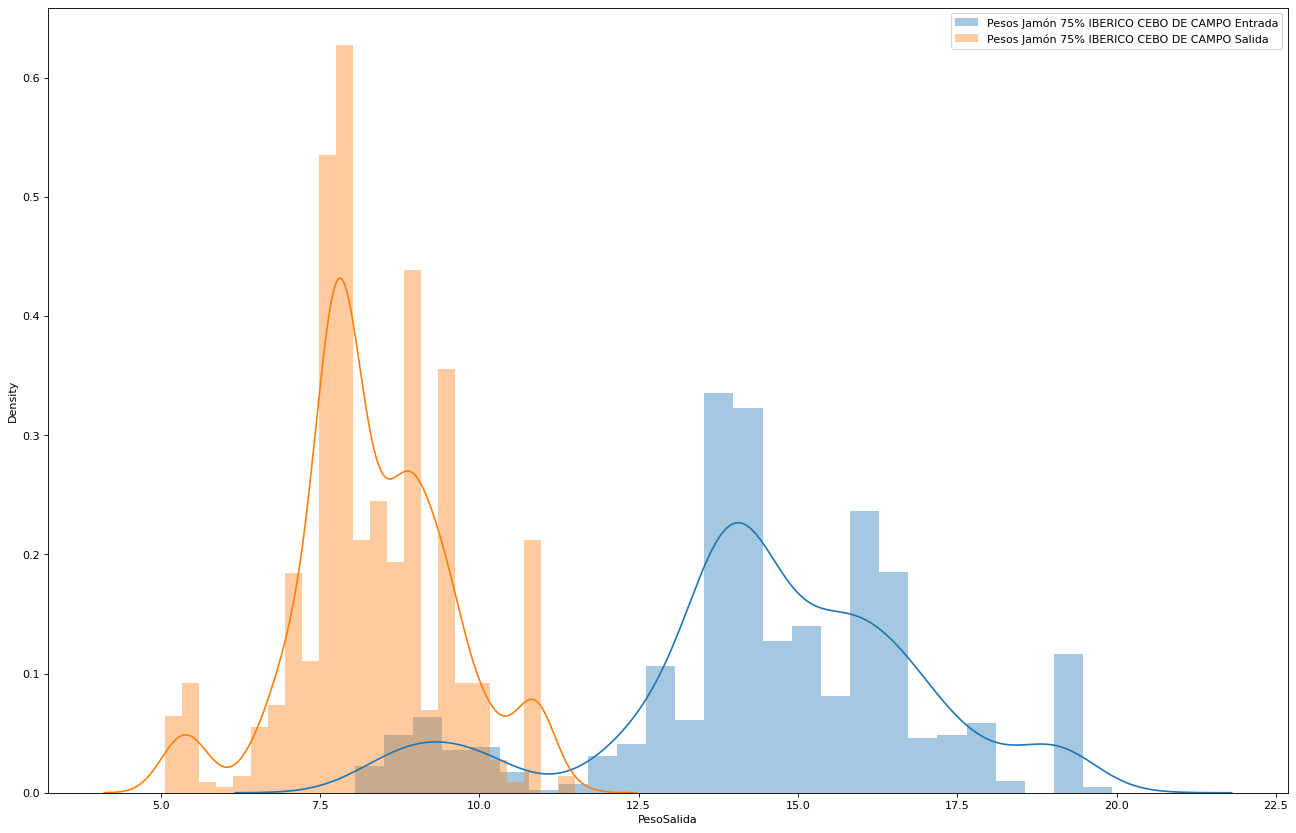

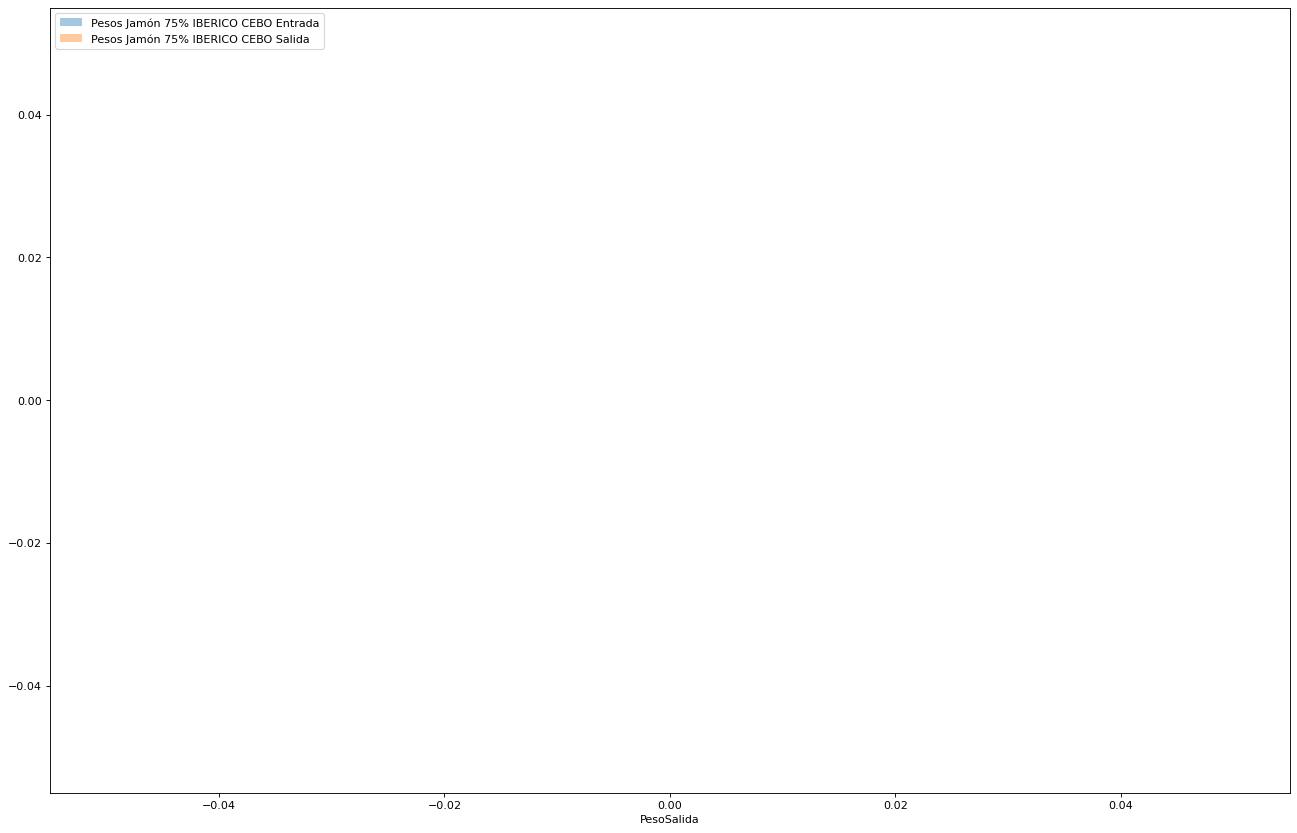

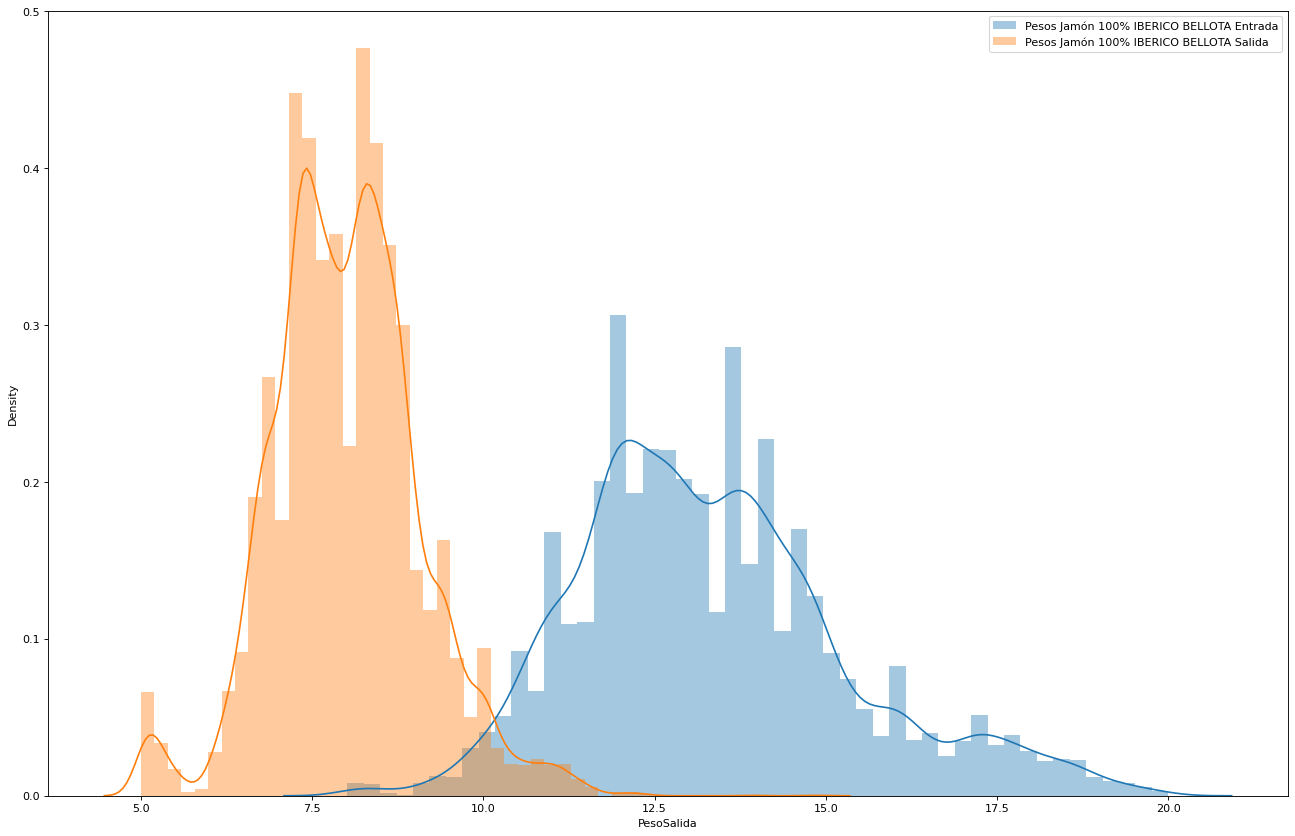

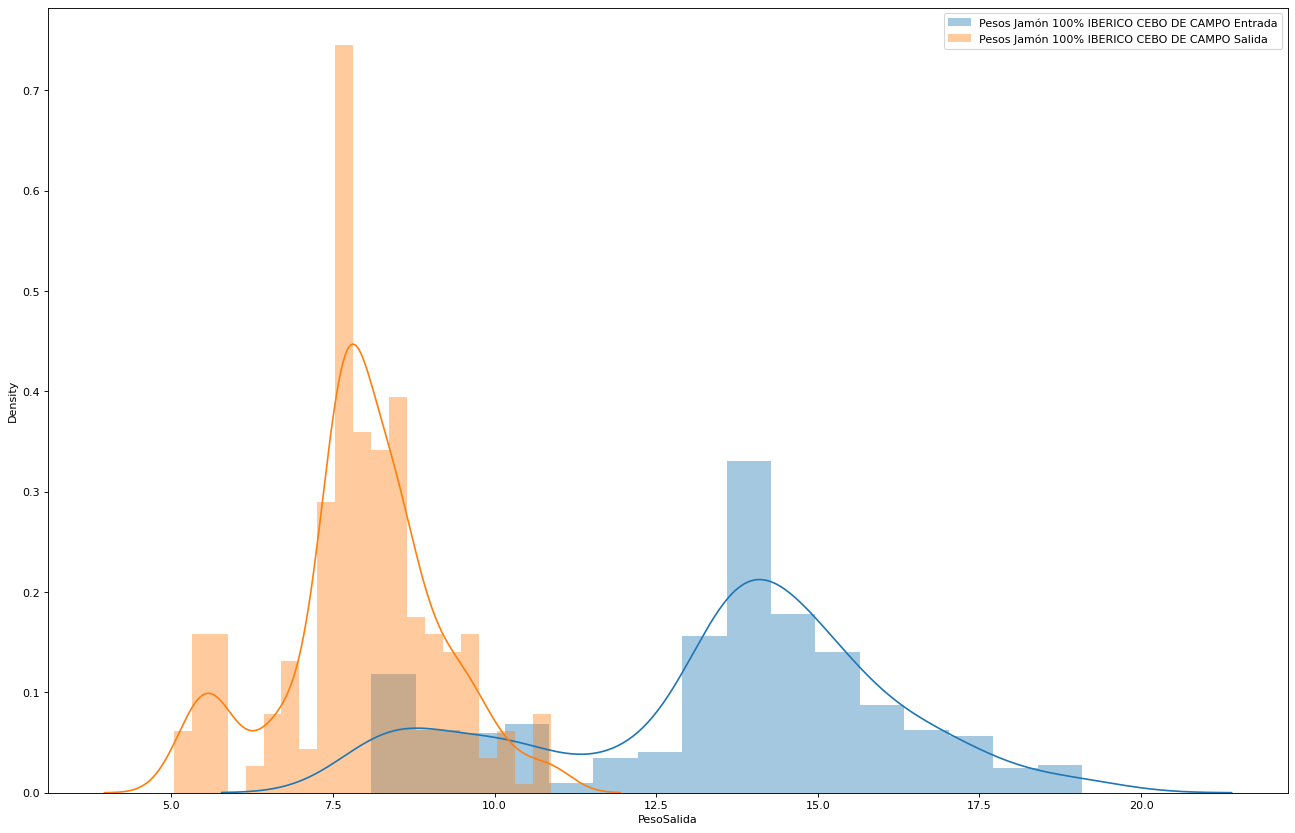

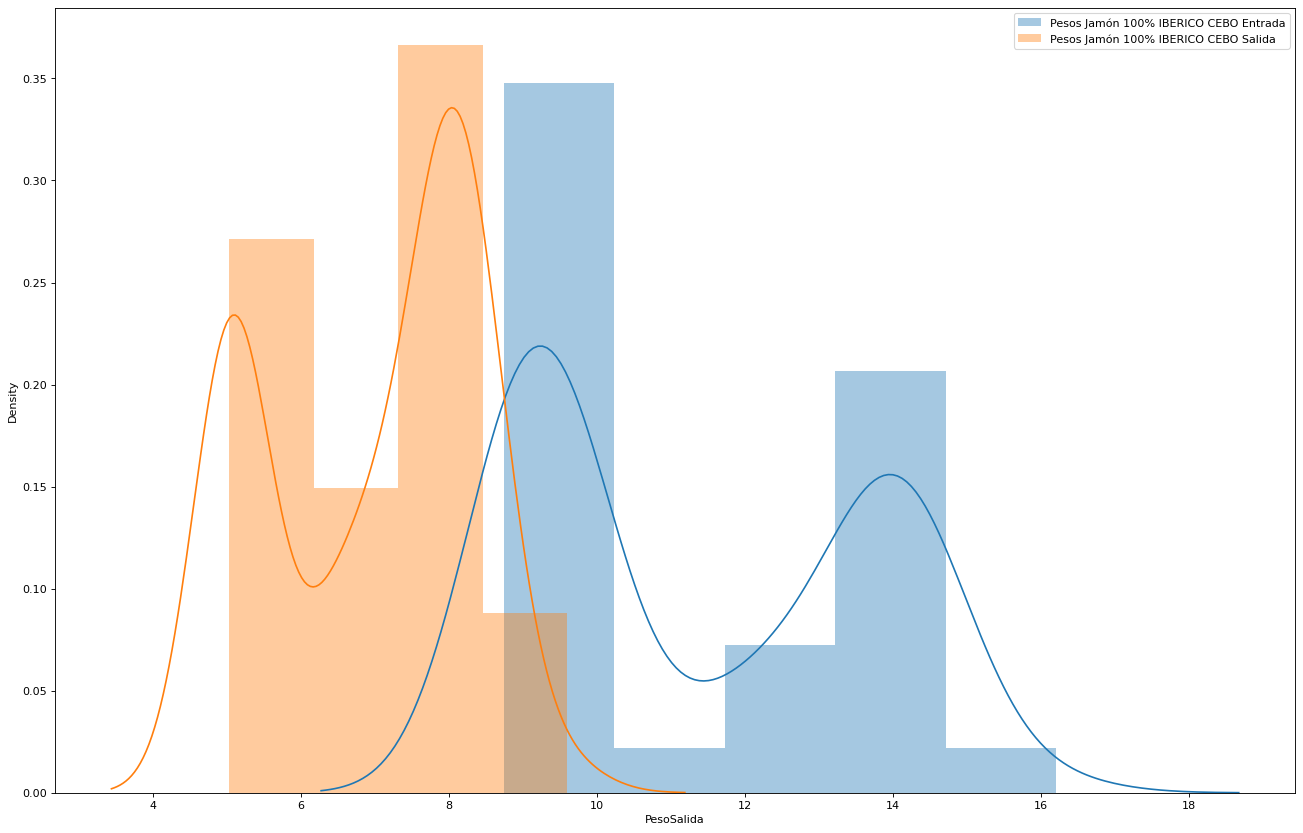

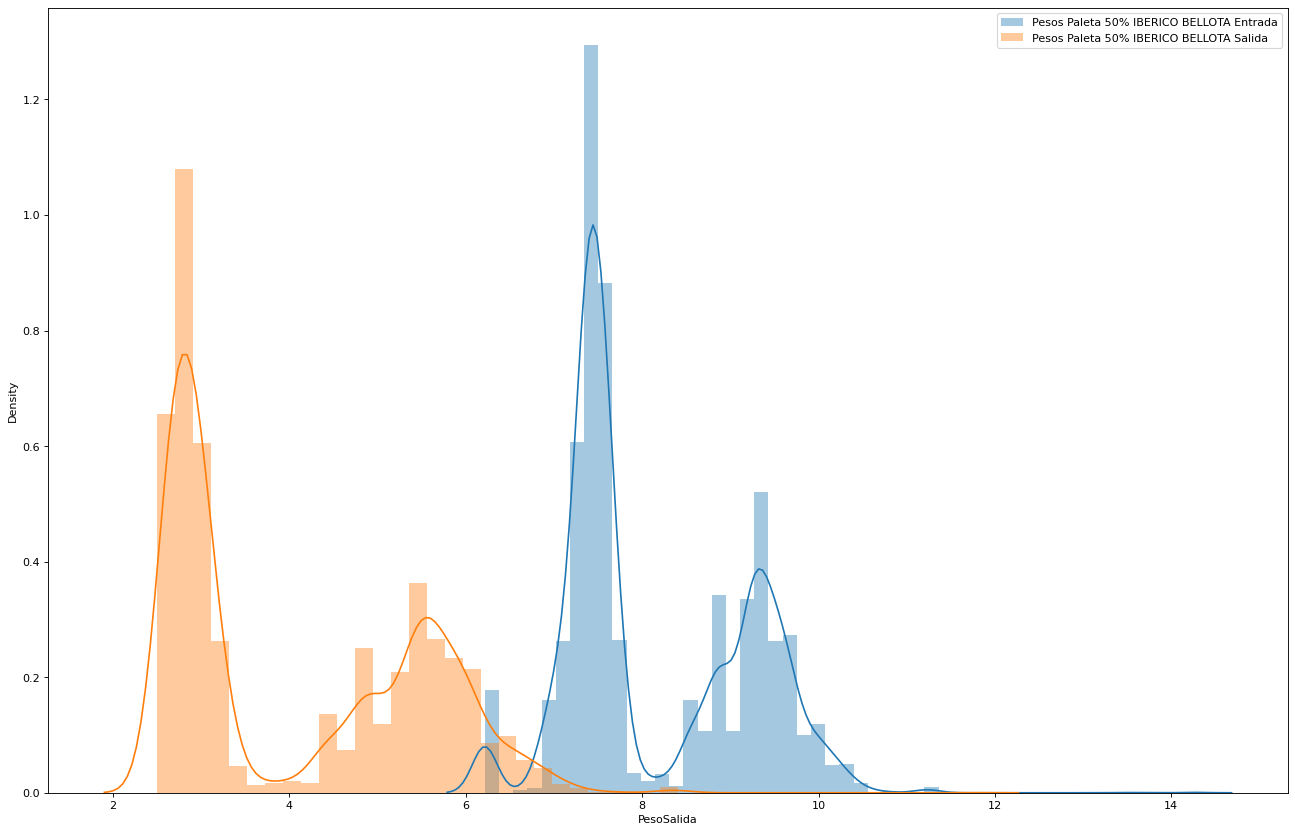

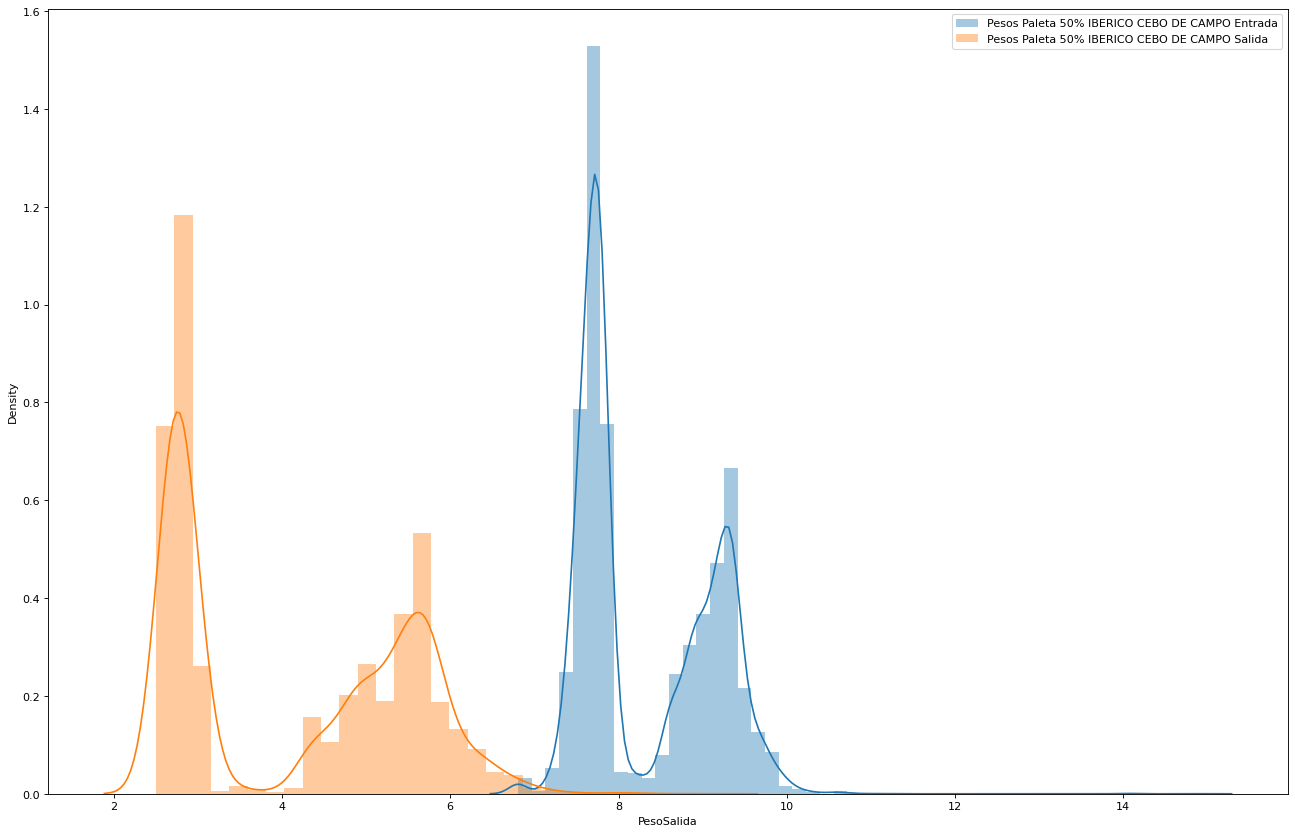

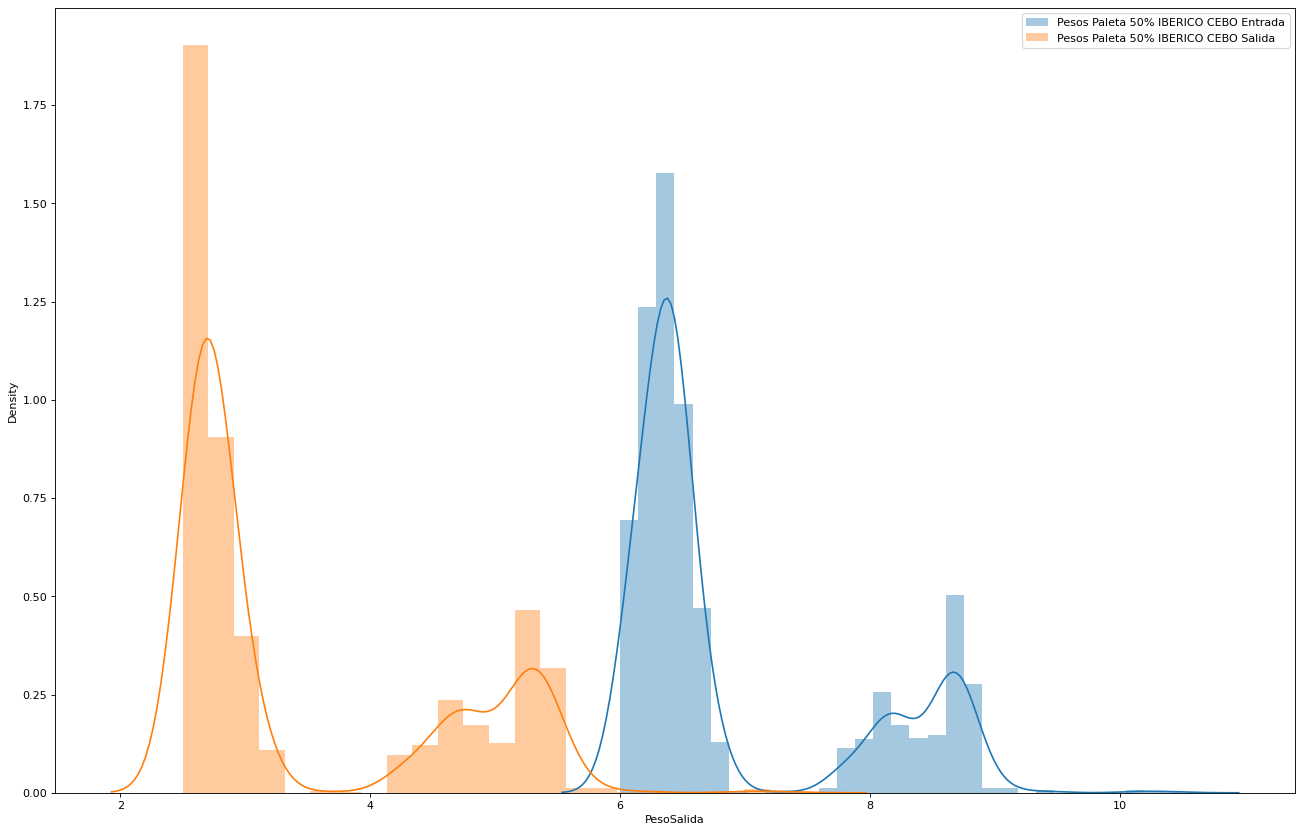

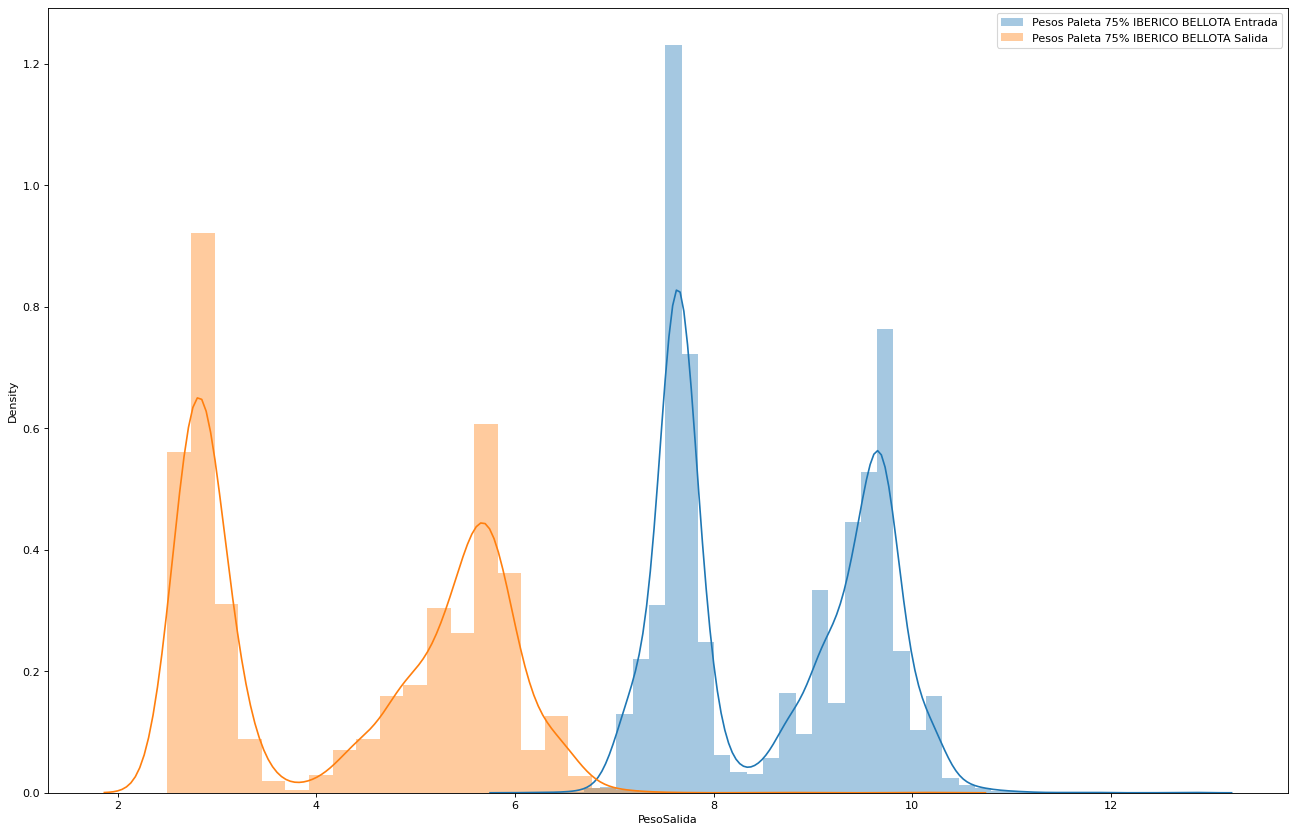

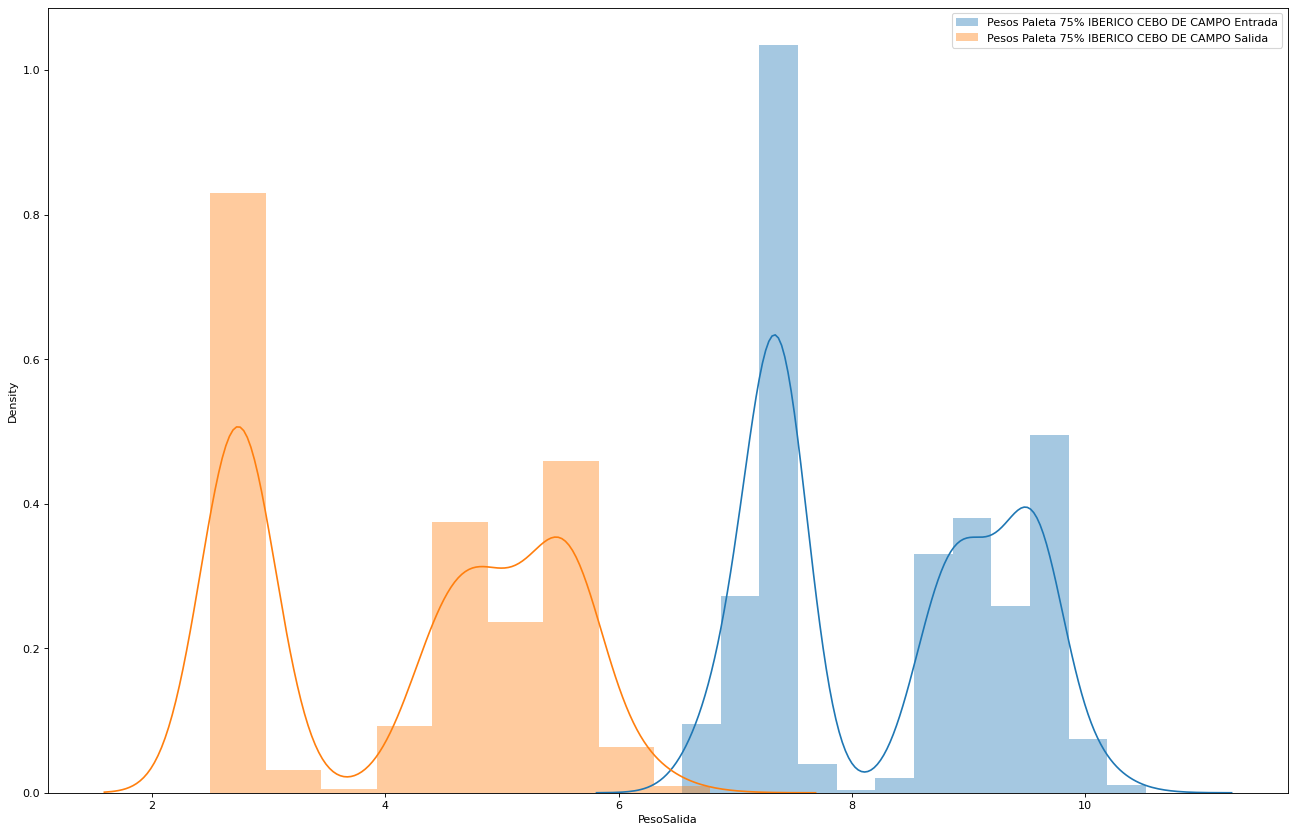

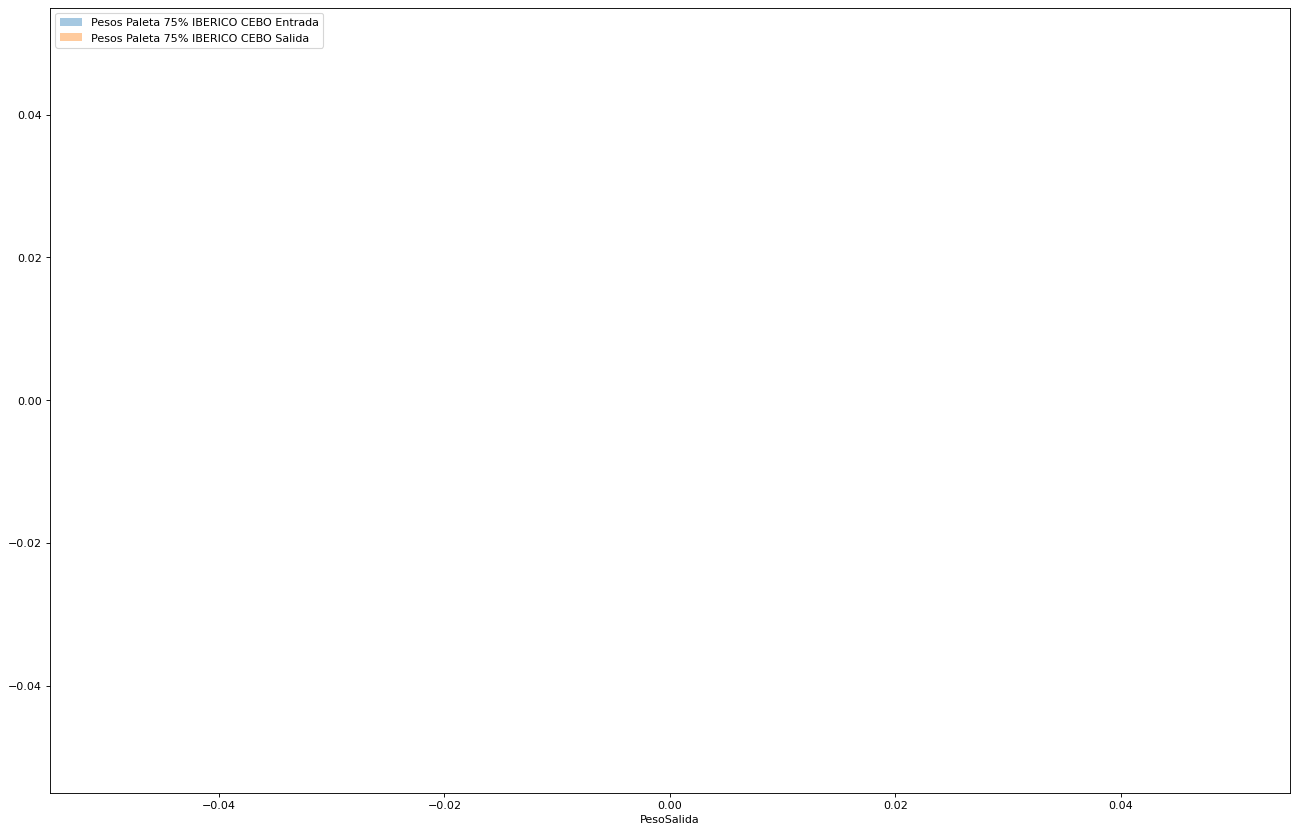

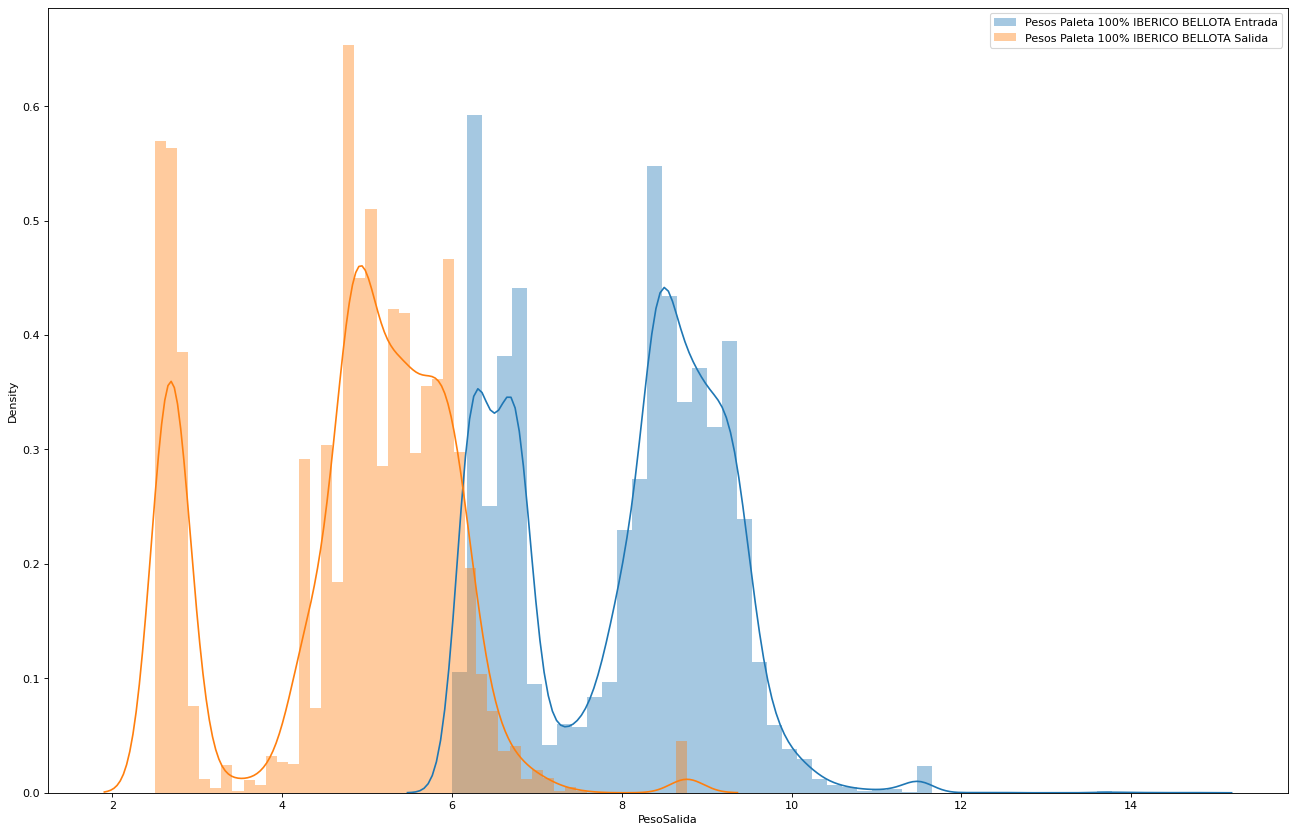

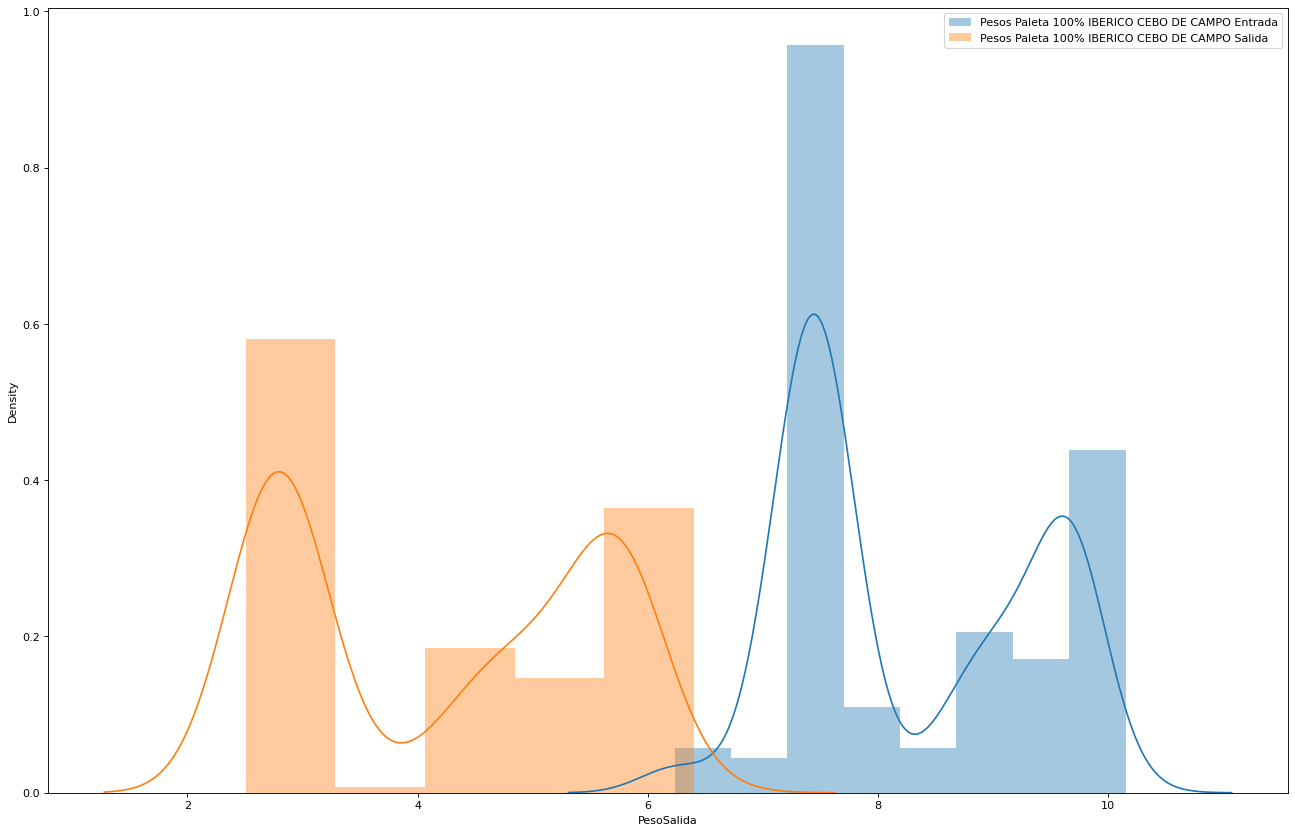

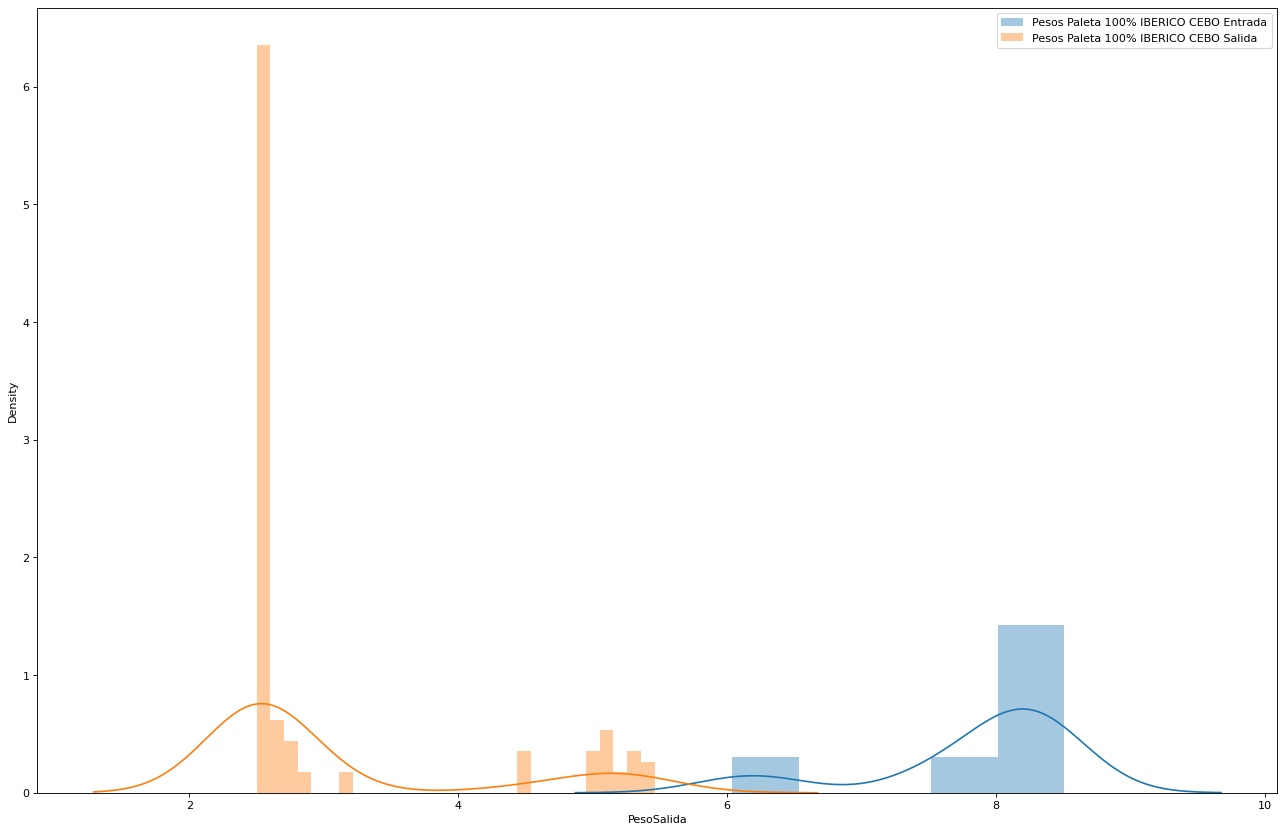

In [104]:

df_WngDt6 = df_WngDt5.copy()

# df_WngDt6[df_WngDt6["TipoArticuloEscandallo"]=="Jamón"].groupby("Añada").agg("count")
# df_WngDt6[df_WngDt6["TipoArticuloEscandallo"]=="Paleta"].groupby("Añada").agg("mean")


# df_WngDt6[~(( df_WngDt6["DescripcionArticulo"].str.contains("DESH", na=False)) | ( df_WngDt6["DescripcionArticulo"].str.contains("CAJA", na=False)) | ( df_WngDt6["DescripcionArticulo"].str.contains("MADERA", na=False)))]



L2pieza = []
L2raza = []
L2alimentacion = []
L2mediaE = []
L2mediaS = []
L2desvE = []
L2desvS = []
L2countE = []
L2countS = []

diccPieza = {}
diccPieza["Jamón"] = [[8, 20],[5, 16.4]]
diccPieza["Paleta"] = [[6, 15],[2.5, 12]]
# diccPieza["Jamón"] = [[8, 18],[5, 15]]
# diccPieza["Paleta"] = [[6, 12],[3, 9]]


for pieza in df_WngDt6["TipoArticuloEscandallo"].unique():
    for raza in df_WngDt6["Raza"].unique():
        for alimentacion in df_WngDt6["Alimentacion"].unique():
            mediaE = df_WngDt6["PesoEntradaEntrada"][(df_WngDt6['Alimentacion']==alimentacion)&(df_WngDt6['Raza']==raza)&(df_WngDt6['TipoArticuloEscandallo']==pieza)&(df_WngDt6['PesoEntradaEntrada'].astype("float").between(diccPieza[pieza][0][0],diccPieza[pieza][0][1]))].mean()
            mediaS = df_WngDt6["PesoSalida"][(df_WngDt6['Alimentacion']==alimentacion)&(df_WngDt6['Raza']==raza)&(df_WngDt6['TipoArticuloEscandallo']==pieza)&(df_WngDt6['PesoSalida'].astype("float").between(diccPieza[pieza][1][0],diccPieza[pieza][1][1]))].mean()
            desvE = df_WngDt6["PesoEntradaEntrada"][(df_WngDt6['Alimentacion']==alimentacion)&(df_WngDt6['Raza']==raza)&(df_WngDt6['TipoArticuloEscandallo']==pieza)&(df_WngDt6['PesoEntradaEntrada'].astype("float").between(diccPieza[pieza][0][0],diccPieza[pieza][0][1]))].std()
            desvS = df_WngDt6["PesoSalida"][(df_WngDt6['Alimentacion']==alimentacion)&(df_WngDt6['Raza']==raza)&(df_WngDt6['TipoArticuloEscandallo']==pieza)&(df_WngDt6['PesoSalida'].astype("float").between(diccPieza[pieza][1][0],diccPieza[pieza][1][1]))].std()
            countE = df_WngDt6["PesoEntradaEntrada"][(df_WngDt6['Alimentacion']==alimentacion)&(df_WngDt6['Raza']==raza)&(df_WngDt6['TipoArticuloEscandallo']==pieza)&(df_WngDt6['PesoEntradaEntrada'].astype("float").between(diccPieza[pieza][0][0],diccPieza[pieza][0][1]))].count()
            countS = df_WngDt6["PesoSalida"][(df_WngDt6['Alimentacion']==alimentacion)&(df_WngDt6['Raza']==raza)&(df_WngDt6['TipoArticuloEscandallo']==pieza)&(df_WngDt6['PesoSalida'].astype("float").between(diccPieza[pieza][1][0],diccPieza[pieza][1][1]))].count()
            
            
            L2pieza.append(pieza)
            L2raza.append(raza)
            L2alimentacion.append(alimentacion)
            L2mediaE.append(mediaE)
            L2mediaS.append(mediaS)
            L2desvE.append(desvE)
            L2desvS.append(desvS)
            L2countE.append(countE)
            L2countS.append(countS)
            
            

            import seaborn
            import matplotlib.pyplot as plt
            fig= plt.subplots(figsize=(20,13), dpi= 80)
            seaborn.distplot(df_WngDt6["PesoEntradaEntrada"][(df_WngDt6['Alimentacion']==alimentacion)&(df_WngDt6['Raza']==raza)&(df_WngDt6['TipoArticuloEscandallo']==pieza)&(df_WngDt6['PesoEntradaEntrada'].astype("float").between(diccPieza[pieza][0][0],diccPieza[pieza][0][1]))], label="Pesos %s %s %s Entrada" %(pieza, raza, alimentacion))
            seaborn.distplot(df_WngDt6["PesoSalida"][(df_WngDt6['Alimentacion']==alimentacion)&(df_WngDt6['Raza']==raza)&(df_WngDt6['TipoArticuloEscandallo']==pieza)&(df_WngDt6['PesoSalida'].astype("float").between(diccPieza[pieza][1][0],diccPieza[pieza][1][1]))], label="Pesos %s %s %s Salida" %(pieza, raza, alimentacion))
            plt.legend()
           
dicc2 = {'desc_pieza': L2pieza, 'desc_raza': L2raza, 'desc_alimentacion': L2alimentacion,'mediaE': L2mediaE,'mediaS': L2mediaS,'desvE': L2desvE,'desvS': L2desvS,'countE': L2countE,'countS': L2countS}
            
df_estadisticas2 = pd.DataFrame(data=dicc2)
df_estadisticas2

In [105]:
# PASO 5 WRONG DATA
# PesoSalida                  3355 <-- 5. Identificar pesadas que no sean de la pieza entera (p.ej. deshuesadas)

import re

# Hay pesadas deshuesadas, en blisters y de pieza entera
# Para la BBDD haremos una clasificación previa en funcion del tipo de pesada ya que a posteriori solo se usarán las pesadas
# de pieza entera.


df_WngDt7 = df_WngDt6.copy()

df_WngDt7["TipoPesadaSalida"]=""

df_WngDt7["TipoPesadaSalida"] = np.where (df_WngDt7["DescripcionArticulo"].str.contains("DESH"), "Pesada pieza deshuesada", df_WngDt7["TipoPesadaSalida"])
df_WngDt7["TipoPesadaSalida"] = np.where (df_WngDt7["DescripcionArticulo"].str.contains("CAJA")|df_WngDt7['DescripcionArticulo'].str.contains("MADERA"), "Pesada blisters para caja",df_WngDt7["TipoPesadaSalida"])
df_WngDt7["TipoPesadaSalida"] = np.where (df_WngDt7["TipoPesadaSalida"]=="", "Pesada PIEZA ENTERA", df_WngDt7["TipoPesadaSalida"])

df_WngDt7["EstadoProductoSalida"] = np.where (df_WngDt7['DescripcionArticulo'].str.contains("APT"), "NO APTO PARA CONSUMO", "APTO PARA CONSUMO")


df_WngDt7["TipoPesadaSalida"].unique()

array(['Pesada PIEZA ENTERA', 'Pesada pieza deshuesada',
       'Pesada blisters para caja'], dtype=object)

In [106]:
# PASO 6 WRONG DATA
# FechaEntrada                 298 <-- 6. Checkear que la diferencia entre fecha de entrada y salida sea coherente.

from datetime import datetime as dt

df_WngDt8 = df_WngDt7.copy()

df_WngDt8['FechaEntrada'] =  pd.to_datetime(df_WngDt8['FechaEntrada'])
df_WngDt8['FechaSalida'] =  pd.to_datetime(df_WngDt8['FechaSalida'])

# Los jamones que tengan menos de 15 meses en almacen se guardarán con una categoría en EstadoProductoSalida 
# como SALIDO PREMATURA para separarlos para el posterior estudio

df_WngDt8["EstadoProductoSalida"]=np.where((round((df_WngDt8["FechaSalida"]-df_WngDt8["FechaEntrada"]).dt.days)/30)<15, "Salida Prematura", "Salida Correcta")
df_WngDt8["EstadoProductoSalida"]

0         Salida Correcta
1         Salida Correcta
2         Salida Correcta
3         Salida Correcta
4         Salida Correcta
               ...       
158723    Salida Correcta
158724    Salida Correcta
158725    Salida Correcta
158726    Salida Correcta
158727    Salida Correcta
Name: EstadoProductoSalida, Length: 150434, dtype: object

In [107]:
df_WngDt7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150434 entries, 0 to 158727
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   TipoArticuloEscandallo  150434 non-null  object 
 1   Añada                   150434 non-null  int64  
 2   Partida                 150434 non-null  int64  
 3   Raza                    150434 non-null  object 
 4   Alimentacion            150434 non-null  object 
 5   NumeroSerieLc           150434 non-null  int64  
 6   AcidoOleico             150434 non-null  float64
 7   AcidoPalmitico          150434 non-null  float64
 8   AcidoEstearico          150434 non-null  float64
 9   AcidoLinoleico          150434 non-null  float64
 10  PesoVarios              150434 non-null  float64
 11  Pesovientres            150434 non-null  float64
 12  PesoCerdos              150434 non-null  float64
 13  PesoNetoCanal           150434 non-null  float64
 14  Nacimiento          

In [108]:
df_WngDt7.to_csv('Step1JamonesDataExtraction.csv',sep=";",index=False)